## 1. Importing Libraries

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import skew

from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import seaborn as sns

import eda_helper_functions as eda

import missingno as msno

import importlib
importlib.reload(eda)

<module 'eda_helper_functions' from 'F:\\Rishabh\\House-Price-Prediction-MLOps-Project\\notebooks\\eda_helper_functions.py'>

## 2. Reading the Data

In [2]:
PROJECT_DIR = Path(r"F:\Rishabh\House-Price-Prediction-MLOps-Project")
DATA_DIR = "data/train"

In [3]:
def read_data(name):
    file_name = f"{name}.csv"
    file_path = PROJECT_DIR/DATA_DIR/file_name

    return pd.read_csv(file_path)

In [4]:
houses = read_data("train")

In [5]:
houses

amount       location  carpet_area   transaction      furnishing  \
0       1.900  greater-noida       5500.0        Resale     Unfurnished   
1       0.400      mangalore          NaN        Resale  Semi-Furnished   
2       1.060          surat       1175.0  New Property     Unfurnished   
3       1.600        gurgaon       1350.0        Resale  Semi-Furnished   
4       0.270        gwalior          NaN  New Property     Unfurnished   
...       ...            ...          ...           ...             ...   
46903   0.695      hyderabad       1155.0  New Property     Unfurnished   
46904   0.160          surat          NaN        Resale     Unfurnished   
46905   0.650         mohali          NaN        Resale     Unfurnished   
46906   0.550         nagpur        860.0        Resale     Unfurnished   
46907   0.426        kolkata          NaN  New Property     Unfurnished   

             facing  bathroom  balcony  ownership  super_area  num_bhk  \
0      North - East       5.0      6.0  Leasehold         NaN      6.0   
1               NaN       2.0      1.0        NaN      1250.0      2.0   
2              East       3.0      4.0   Freehold         NaN      3.0   
3              East       3.0      3.0   Freehold         NaN      3.0   
4               NaN       2.0      1.0        NaN       750.0      2.0   
...             ...       ...      ...        ...         ...      ...   
46903          East       2.0      1.0   Freehold         NaN      2.0   
46904           NaN       1.0      NaN        NaN       660.0      1.0   
46905           NaN       4.0      NaN        NaN      2500.0      4.0   
46906          East       2.0      2.0   Freehold         NaN      2.0   
46907           NaN       2.0      NaN        NaN      1079.0      3.0   

       is_studio  floor_num  num_floors  overlooking_garden  \
0              0        8.0         8.0                 1.0   
1              0        2.0         4.0                 NaN   
2              0        5.0        10.0                 1.0   
3              0        2.0         4.0                 NaN   
4              0        3.0         3.0                 NaN   
...          ...        ...         ...                 ...   
46903          0        4.0         9.0                 1.0   
46904          0        3.0         5.0                 NaN   
46905          0        8.0         9.0                 NaN   
46906          0        2.0         3.0                 1.0   
46907          0        NaN         NaN                 NaN   

       overlooking_mainroad  overlooking_pool  parking_spots parking_cover  \
0                       1.0               1.0            NaN           NaN   
1                       NaN               NaN            1.0       Covered   
2                       1.0               0.0            1.0       Covered   
3                       NaN               NaN            1.0       Covered   
4                       NaN               NaN            NaN           NaN   
...                     ...               ...            ...           ...   
46903                   0.0               0.0            NaN           NaN   
46904                   NaN               NaN            NaN           NaN   
46905                   NaN               NaN            NaN           NaN   
46906                   0.0               0.0            NaN           NaN   
46907                   NaN               NaN            1.0          Open   

        price  
0      2923.0  
1      3200.0  
2      5236.0  
3      9877.0  
4      3600.0  
...       ...  
46903  6017.0  
46904  2424.0  
46905  2600.0  
46906  5789.0  
46907  3950.0  

[46908 rows x 20 columns]

In [6]:
houses.dtypes

amount                  float64
location                 object
carpet_area             float64
transaction              object
furnishing               object
facing                   object
bathroom                float64
balcony                 float64
ownership                object
super_area              float64
num_bhk                 float64
is_studio                 int64
floor_num               float64
num_floors              float64
overlooking_garden      float64
overlooking_mainroad    float64
overlooking_pool        float64
parking_spots           float64
parking_cover            object
price                   float64
dtype: object

## 3. High Level Analysis of data

In [7]:
print(f"The dataset has {houses.shape[0]} rows and {houses.shape[1]} columns")

The dataset has 46908 rows and 20 columns


In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46908 entries, 0 to 46907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                46908 non-null  float64
 1   location              46908 non-null  object 
 2   carpet_area           24693 non-null  float64
 3   transaction           46908 non-null  object 
 4   furnishing            46293 non-null  object 
 5   facing                28225 non-null  object 
 6   bathroom              46908 non-null  float64
 7   balcony               34723 non-null  float64
 8   ownership             29363 non-null  object 
 9   super_area            22215 non-null  float64
 10  num_bhk               46908 non-null  float64
 11  is_studio             46908 non-null  int64  
 12  floor_num             45293 non-null  float64
 13  num_floors            45261 non-null  float64
 14  overlooking_garden    26290 non-null  float64
 15  overlooking_mainroa

In [9]:
(
    houses
    .describe(include = "number")
)

amount   carpet_area     bathroom       balcony    super_area  \
count  46908.000000  24693.000000  46908.00000  34723.000000  22215.000000   
mean       0.736310   1171.659833      2.35090      1.860928   1330.151598   
std        0.558781    589.768473      0.79336      1.034142    678.914234   
min        0.100000     90.000000      1.00000      0.000000    150.000000   
25%        0.400000    805.000000      2.00000      1.000000    936.459300   
50%        0.600000   1060.000000      2.00000      2.000000   1202.000000   
75%        0.880000   1400.000000      3.00000      3.000000   1580.000000   
max       11.000000  10000.000000     10.00000     10.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  46908.000000  46908.000000  45293.000000  45261.000000   
mean       2.513814      0.000192      4.081116      8.049005   
std        0.792820      0.013850      3.817494      5.860156   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      2.000000      4.000000   
50%        3.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      5.000000     12.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count        26290.000000          26290.000000      26290.000000   
mean             0.650970              0.748878          0.224952   
std              0.476673              0.433667          0.417559   
min              0.000000              0.000000          0.000000   
25%              0.000000              0.000000          0.000000   
50%              1.000000              1.000000          0.000000   
75%              1.000000              1.000000          0.000000   
max              1.000000              1.000000          1.000000   

       parking_spots         price  
count   19378.000000  46908.000000  
mean        3.883115   5076.500064  
std        32.925207   1835.712406  
min         1.000000    204.000000  
25%         1.000000   3704.000000  
50%         1.000000   4771.000000  
75%         1.000000   6162.250000  
max       999.000000  10000.000000

In [10]:
(
    houses
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count       46908       46908        46293  28225     29363         19378
unique         81           4            3      8         4             2
top     faridabad      Resale  Unfurnished   East  Freehold       Covered
freq         2416       34488        20260  13256     25378         16611

In [11]:
# outliers for num_bhk,balcony and bathroom
forest = IsolationForest()

(
    houses[["num_bhk","balcony","bathroom"]]
    .loc[lambda df: ~df.balcony.isnull()]
    .assign(
        outlier = forest.fit_predict(
            houses[["num_bhk","balcony","bathroom"]]
            .loc[lambda df: ~df.balcony.isnull()]
            .select_dtypes(include = "number")
        )
    )
    .query("outlier == -1")
    .sort_values(by = 'bathroom',ascending = False)
    .loc[lambda df: (df.balcony.ge(df.num_bhk + 2)) | (df.bathroom.ge(df.num_bhk + 2))]
)

Empty DataFrame
Columns: [num_bhk, balcony, bathroom, outlier]
Index: []

- These above data points have unusual values with too many balconies and bathrooms for less bhk so should be removed

## 4. High level analysis of missing values

In [12]:
(
    houses
    .pipe(eda.missing_info)
)

count  percentage
variable                               
parking_spots         27530   58.689349
parking_cover         27530   58.689349
super_area            24693   52.641340
carpet_area           22215   47.358660
overlooking_garden    20618   43.954123
overlooking_pool      20618   43.954123
overlooking_mainroad  20618   43.954123
facing                18683   39.829027
ownership             17545   37.403002
balcony               12185   25.976379
num_floors             1647    3.511128
floor_num              1615    3.442910
furnishing              615    1.311077

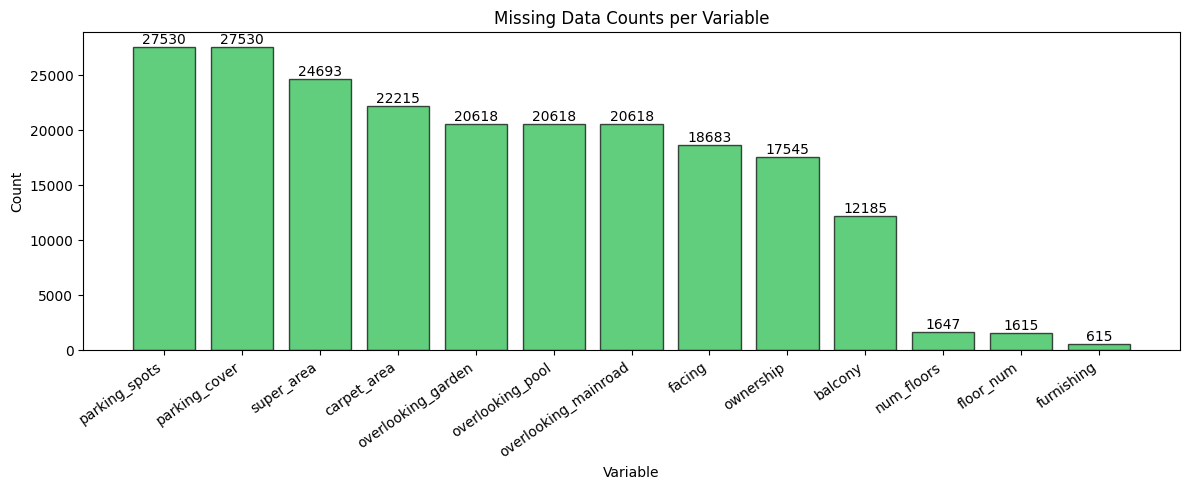

In [13]:
(
    houses
    .pipe(eda.plot_missing_info, figsize=(12,5))
)

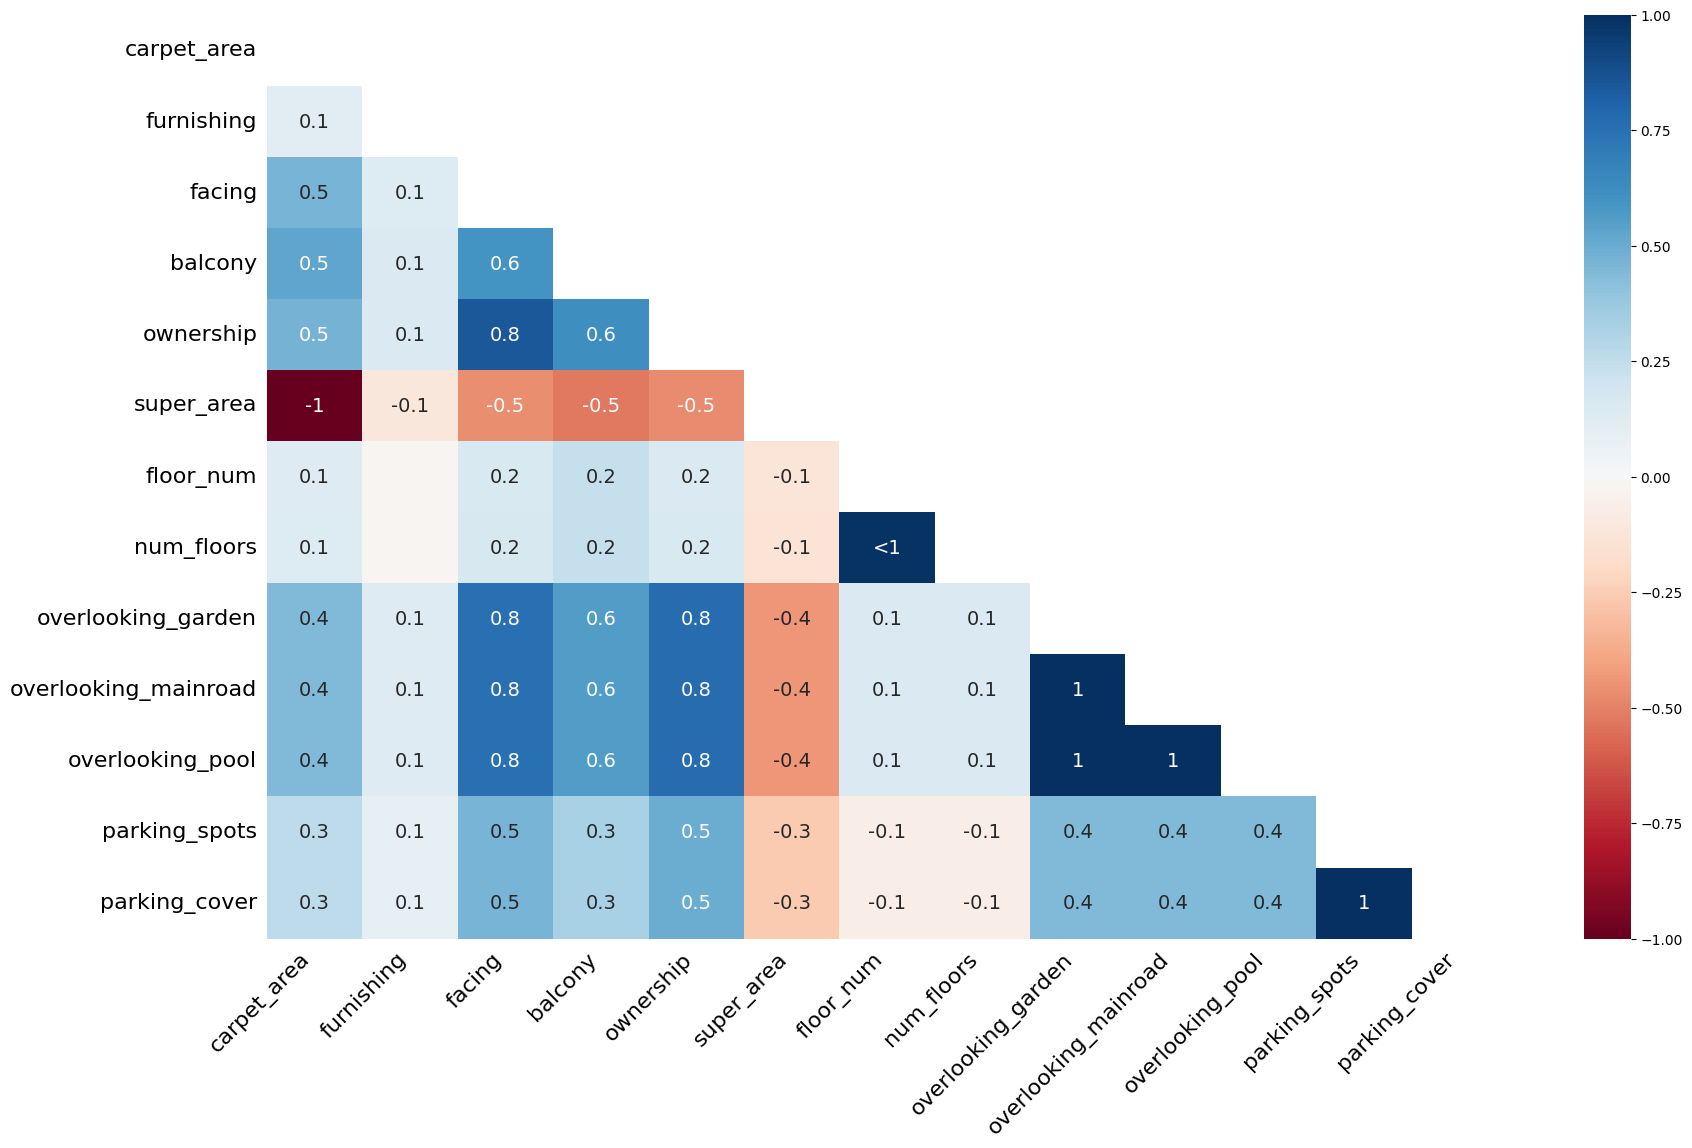

In [14]:
msno.heatmap(houses)
plt.show()

- `carpet_area` and `super_area` have perfect inverse missing value correlation
- whenever `carpet_area` is missing `super_area` is present and vice versa

## 5. Pair Plots

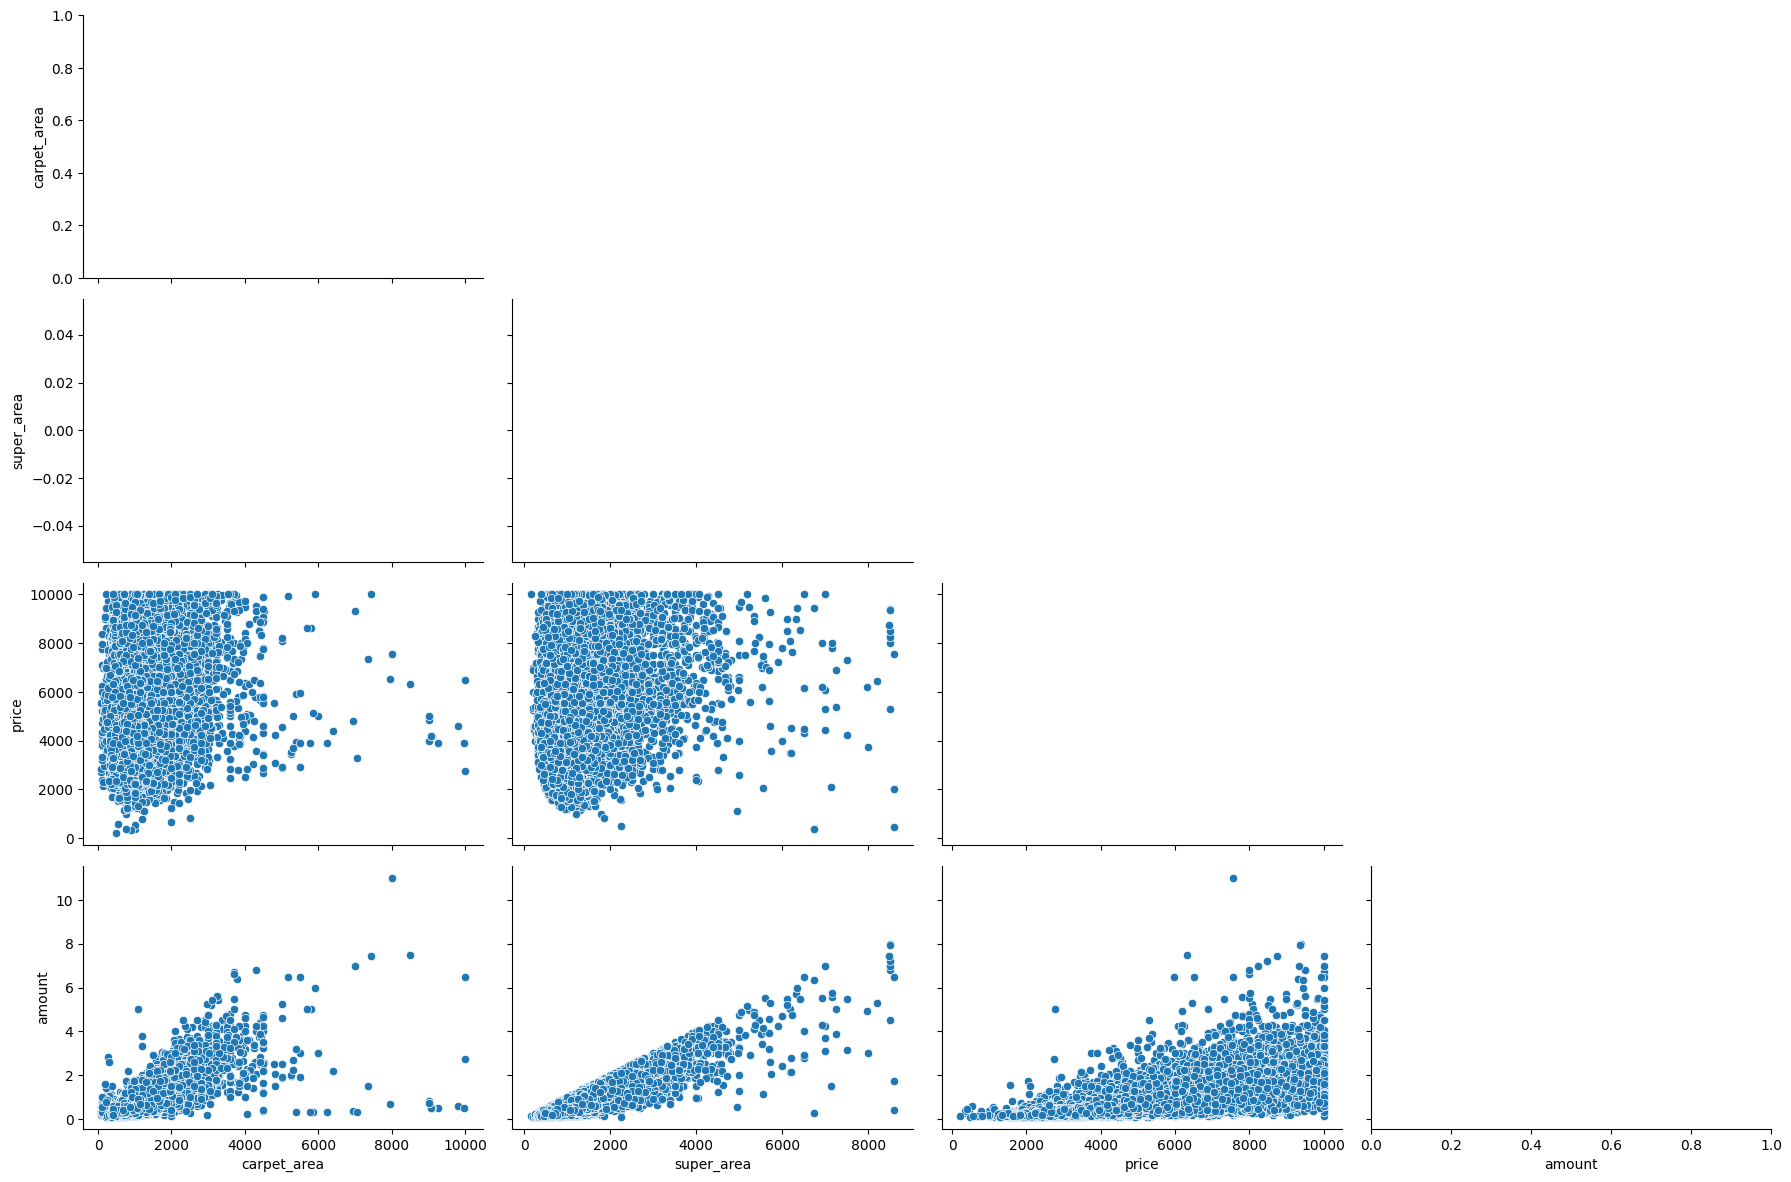

In [15]:
eda.pair_plots(houses[["carpet_area","super_area","price","amount"]])

## 6. Correlation Analysis

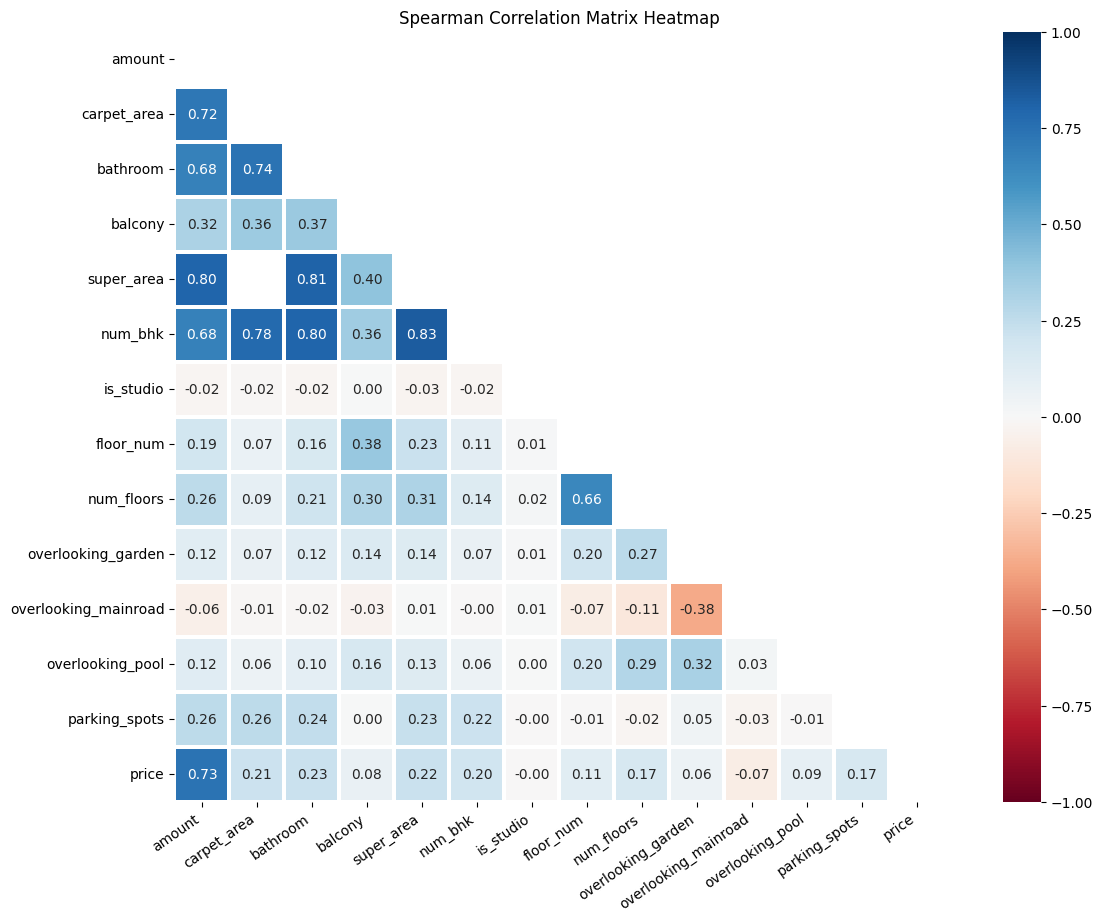

In [16]:
eda.correlation_heatmap(houses, figsize=(15,10))

## 7. Detailed Analysis

### 7.1 `transaction`

In [17]:
houses.transaction

0              Resale
1              Resale
2        New Property
3              Resale
4        New Property
             ...     
46903    New Property
46904          Resale
46905          Resale
46906          Resale
46907    New Property
Name: transaction, Length: 46908, dtype: object

In [18]:
(
    houses
    .pipe(eda.cat_summary,"transaction")
)

0              Resale
1              Resale
2        New Property
3              Resale
4        New Property
             ...     
46903    New Property
46904          Resale
46905          Resale
46906          Resale
46907    New Property
Name: transaction, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


count    46908
unique       4
top     Resale
freq     34488

count  percentage
category                       
Resale        34488   73.522640
New Property  12418   26.473096
Other             1    0.002132
Rent/Lease        1    0.002132

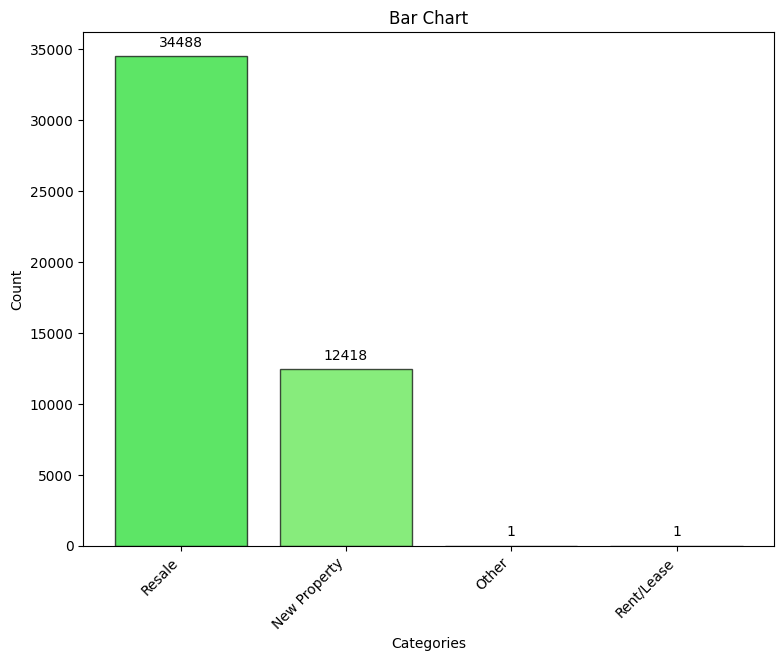

In [19]:
(
    houses
    .pipe(eda.cat_univar_plots,"transaction")
)

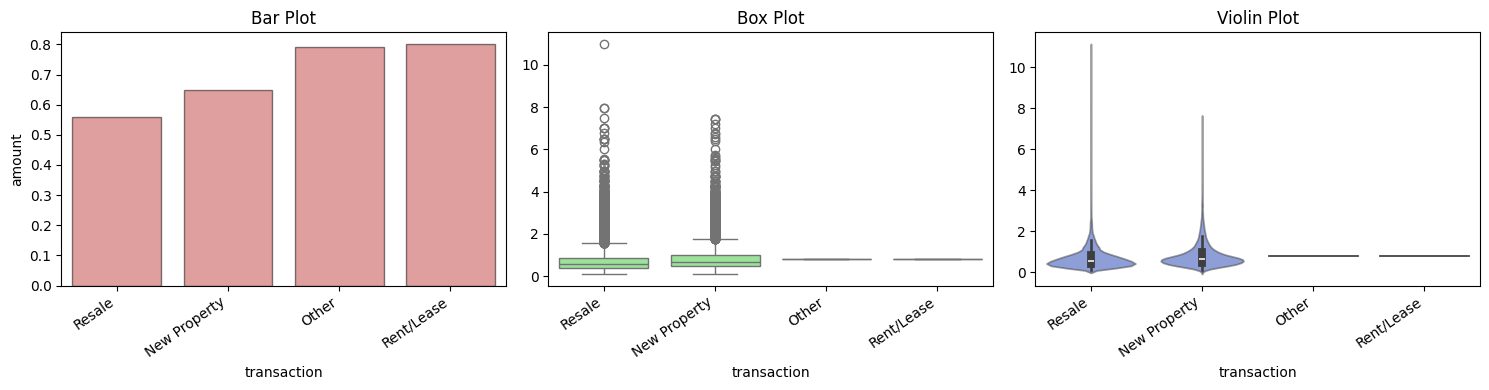

In [20]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","transaction",estimator = "median")
)

- `Other`and `Rent/Lease` are rare and will not impact the model decision making
- These points have to be grouped into other categories

In [21]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","transaction")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 179.53920377463677
- p-value              : 9.397928848824982e-116
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and transaction are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 693.9805553852993
- p-value              : 4.239115909813078e-150
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and transaction are associated to each other


### 7.2 `num_bhk`

In [22]:
houses.num_bhk

0        6.0
1        2.0
2        3.0
3        3.0
4        2.0
        ... 
46903    2.0
46904    1.0
46905    4.0
46906    2.0
46907    3.0
Name: num_bhk, Length: 46908, dtype: float64

In [23]:
(
    houses
    .pipe(eda.num_summary,"num_bhk")
)

0        6.0
1        2.0
2        3.0
3        3.0
4        2.0
        ... 
46903    2.0
46904    1.0
46905    4.0
46906    2.0
46907    3.0
Name: num_bhk, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


value
percentile       
0             1.0
5             1.0
10            2.0
25            2.0
50            3.0
75            3.0
90            3.0
95            4.0
99            4.0
100          10.0

value
mean                2.513814
trimmed mean (5%)   2.502985
trimmed mean (10%)  2.507728
median              3.000000

value
var            0.628564
std            0.792820
IQR            1.000000
mad            1.000000
coef_variance  0.315385

value
skewness  0.542854
kurtosis  3.544561

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.3207772305460034e-107
Test Statistic       : 0.8432270945551453
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 3227.4554220792634
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


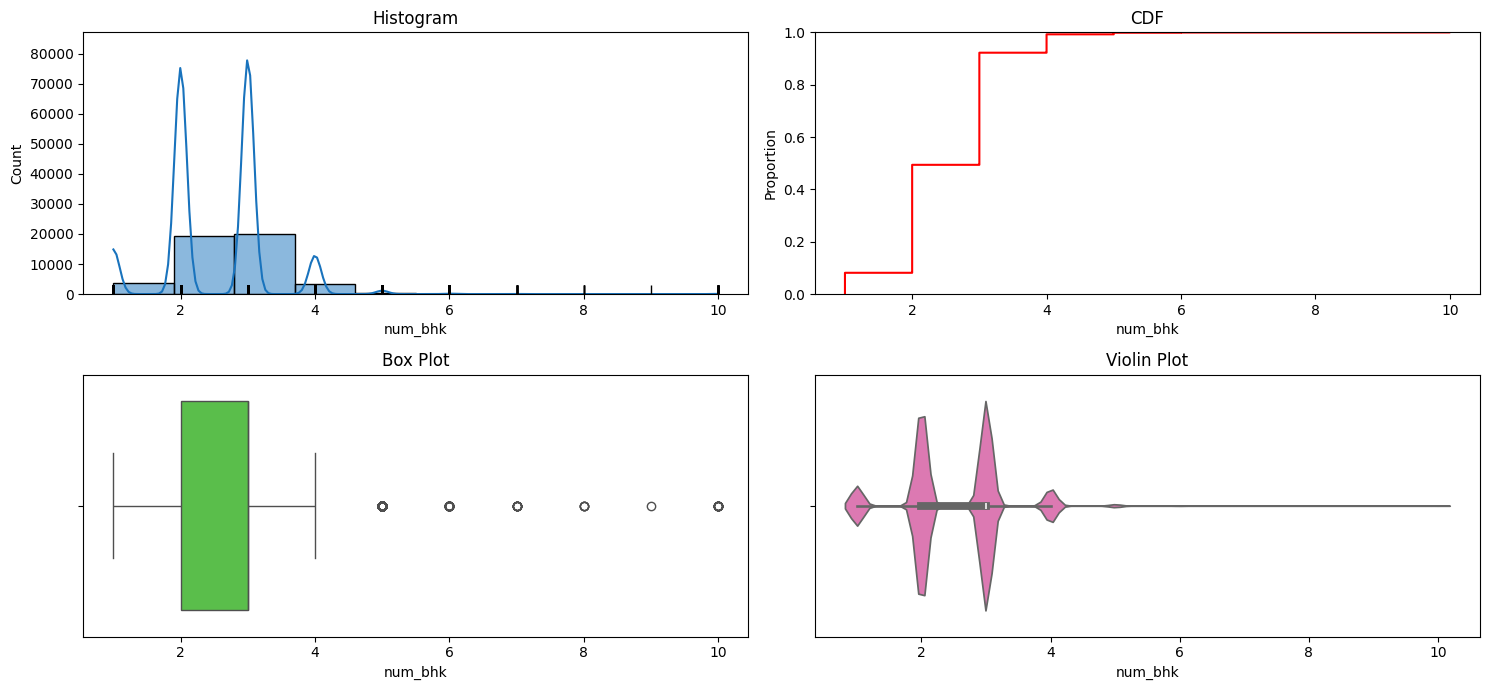

In [24]:
(
    houses
    .pipe(eda.num_univar_plots,"num_bhk")
)

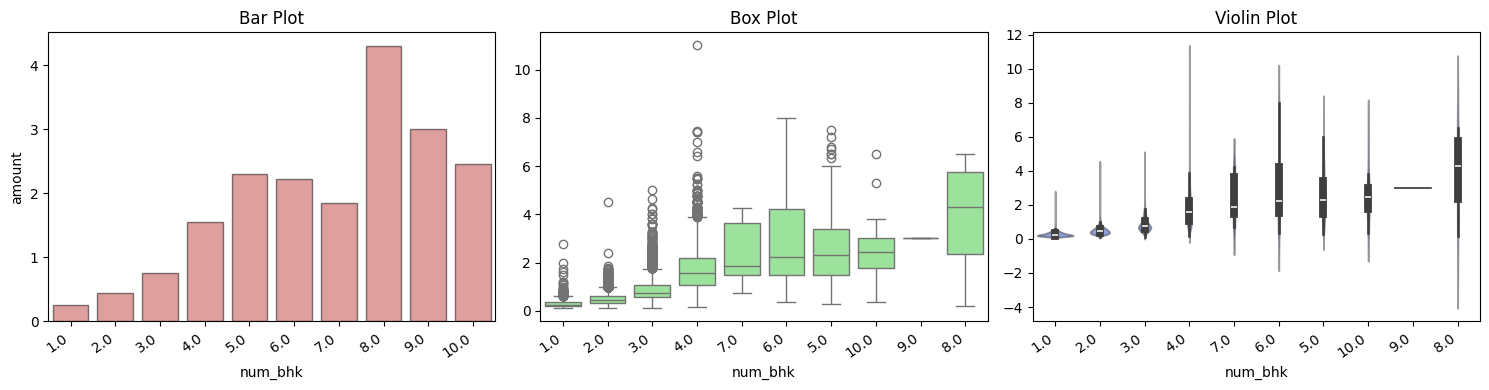

In [25]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","num_bhk")
)

In [26]:
# categorizing houses based on num_bhk
(
    houses
    # .loc[lambda df: ~df.num_bhk.isnull()]
    .assign(
        house_size = lambda df: np.select(
                [
                    df.num_bhk.between(1,3,inclusive = "left"),
                    df.num_bhk.between(3,4,inclusive = "left")
                ],
                ["small","normal"],
                default = "big"
          )
      )
      .pipe(eda.cat_summary,"house_size")
)

0           big
1         small
2        normal
3        normal
4         small
          ...  
46903     small
46904     small
46905       big
46906     small
46907    normal
Name: house_size, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


count   46908
unique      3
top     small
freq    23164

count  percentage
category                   
small     23164   49.381769
normal    20093   42.834911
big        3651    7.783321

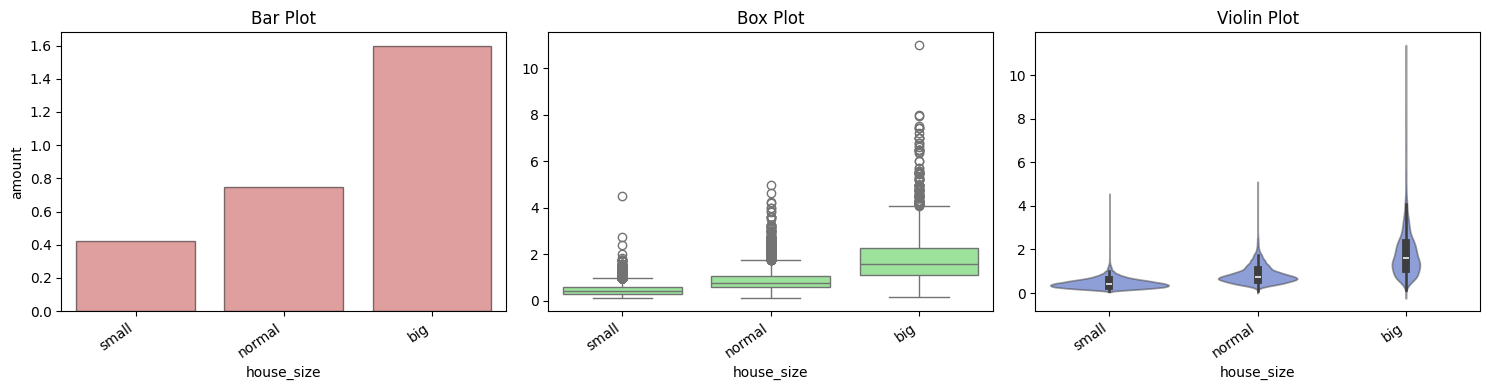

In [27]:
(
    houses
    # .loc[lambda df: ~df.num_bhk.isnull()]
    .assign(
        house_size = lambda df: (
            np.select(
                [
                    df.num_bhk.between(1,3,inclusive = "left"),
                    df.num_bhk.between(3,4,inclusive = "left")
                ],
                ["small","normal"],
                default = "big"
          )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","house_size",estimator = "median")
)

In [28]:
(
    houses
    # .loc[lambda df: ~df.num_bhk.isnull()]
    .assign(
        house_size = lambda df: (
            np.where(
                df.num_bhk.le(2),
                'Normal',
                'Big'
          )
        )
    )
    .pipe(eda.num_cat_hyp_testing,"amount","house_size")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 14803.4147740648
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and house_size are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 17662.063941653792
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and house_size are associated to each other


### 7.3 `bathroom`

In [29]:
houses.bathroom

0        5.0
1        2.0
2        3.0
3        3.0
4        2.0
        ... 
46903    2.0
46904    1.0
46905    4.0
46906    2.0
46907    2.0
Name: bathroom, Length: 46908, dtype: float64

In [30]:
(
    houses
    .pipe(eda.num_summary,"bathroom")
)

0        5.0
1        2.0
2        3.0
3        3.0
4        2.0
        ... 
46903    2.0
46904    1.0
46905    4.0
46906    2.0
46907    2.0
Name: bathroom, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


value
percentile       
0             1.0
5             1.0
10            2.0
25            2.0
50            2.0
75            3.0
90            3.0
95            4.0
99            5.0
100          10.0

value
mean                2.35090
trimmed mean (5%)   2.31849
trimmed mean (10%)  2.32589
median              2.00000

value
var            0.629420
std            0.793360
IQR            1.000000
mad            0.000000
coef_variance  0.337471

value
skewness  0.933093
kurtosis  3.353106

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.2129471478371663e-110
Test Statistic       : 0.8226398975803696
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 3775.1804624357756
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


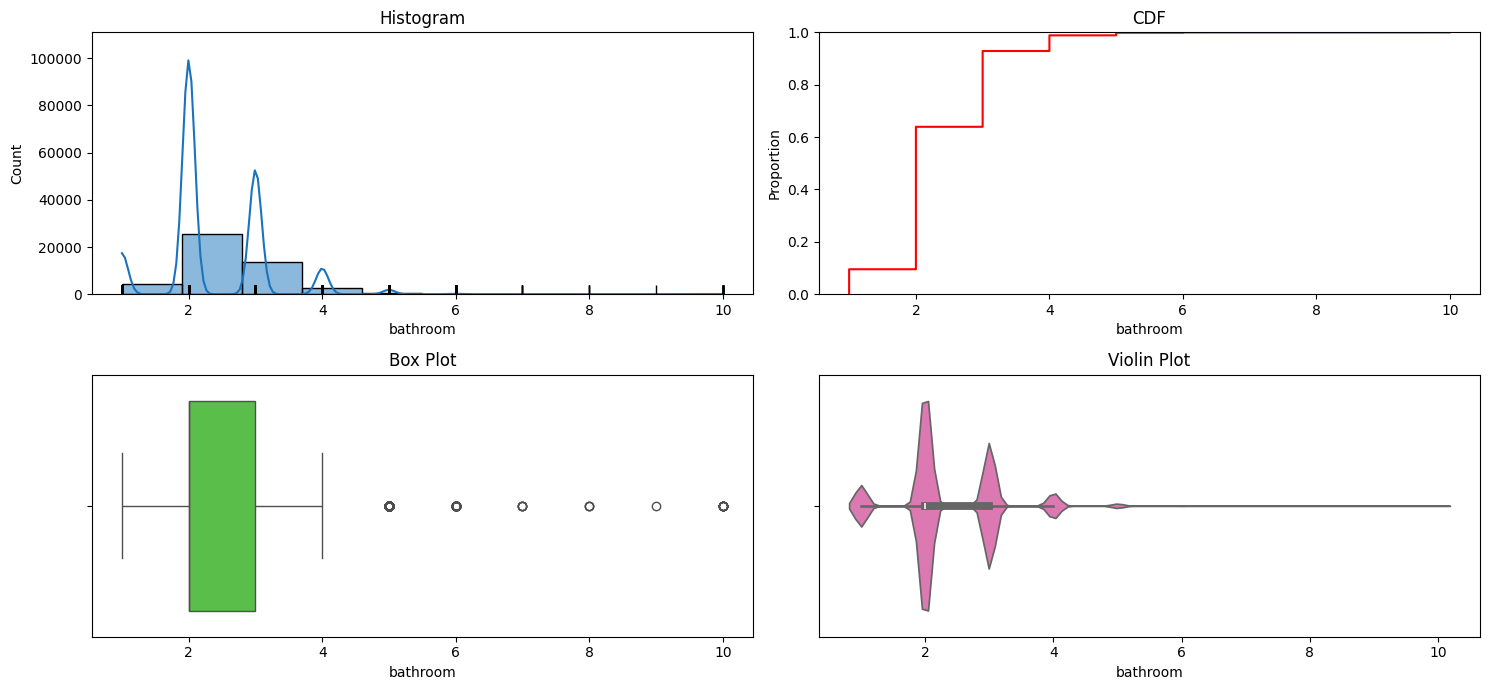

In [31]:
(
    houses
    .pipe(eda.num_univar_plots,"bathroom")
)

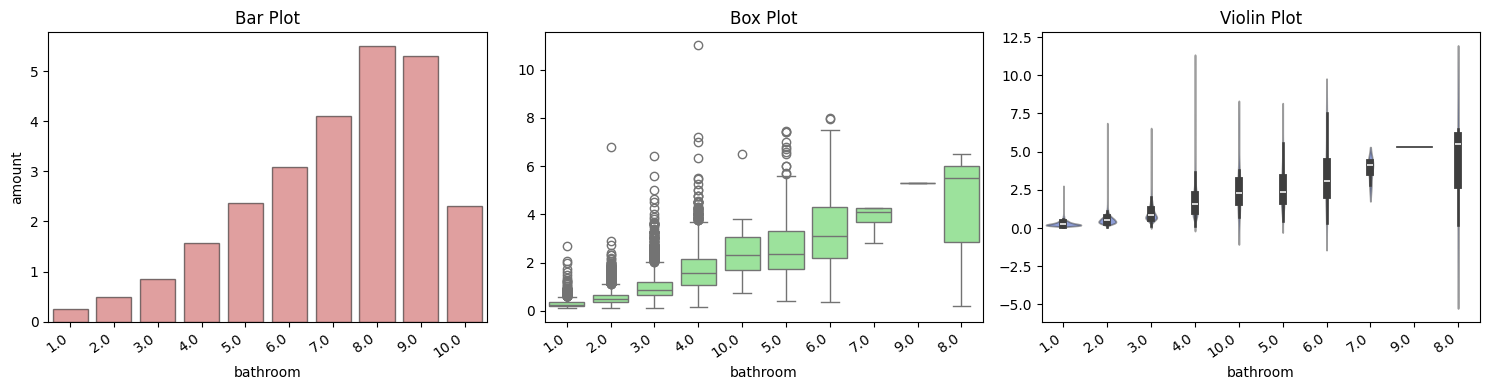

In [32]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","bathroom",estimator = "median")
)

In [33]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","bathroom")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 5127.397167411799
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and bathroom are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 21686.18612384926
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and bathroom are associated to each other


### 7.4 `furnishing`

In [34]:
houses.furnishing

0           Unfurnished
1        Semi-Furnished
2           Unfurnished
3        Semi-Furnished
4           Unfurnished
              ...      
46903       Unfurnished
46904       Unfurnished
46905       Unfurnished
46906       Unfurnished
46907       Unfurnished
Name: furnishing, Length: 46908, dtype: object

In [35]:
(
    houses
    .pipe(eda.cat_summary,"furnishing")
)

0           Unfurnished
1        Semi-Furnished
2           Unfurnished
3        Semi-Furnished
4           Unfurnished
              ...      
46903       Unfurnished
46904       Unfurnished
46905       Unfurnished
46906       Unfurnished
46907       Unfurnished
Name: furnishing, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 615 rows (1.31 %)
Available Data : 46,293 / 46,908 rows


count         46293
unique            3
top     Unfurnished
freq          20260

count  percentage
category                         
Unfurnished     20260   43.764716
Semi-Furnished  19832   42.840170
Furnished        6201   13.395114

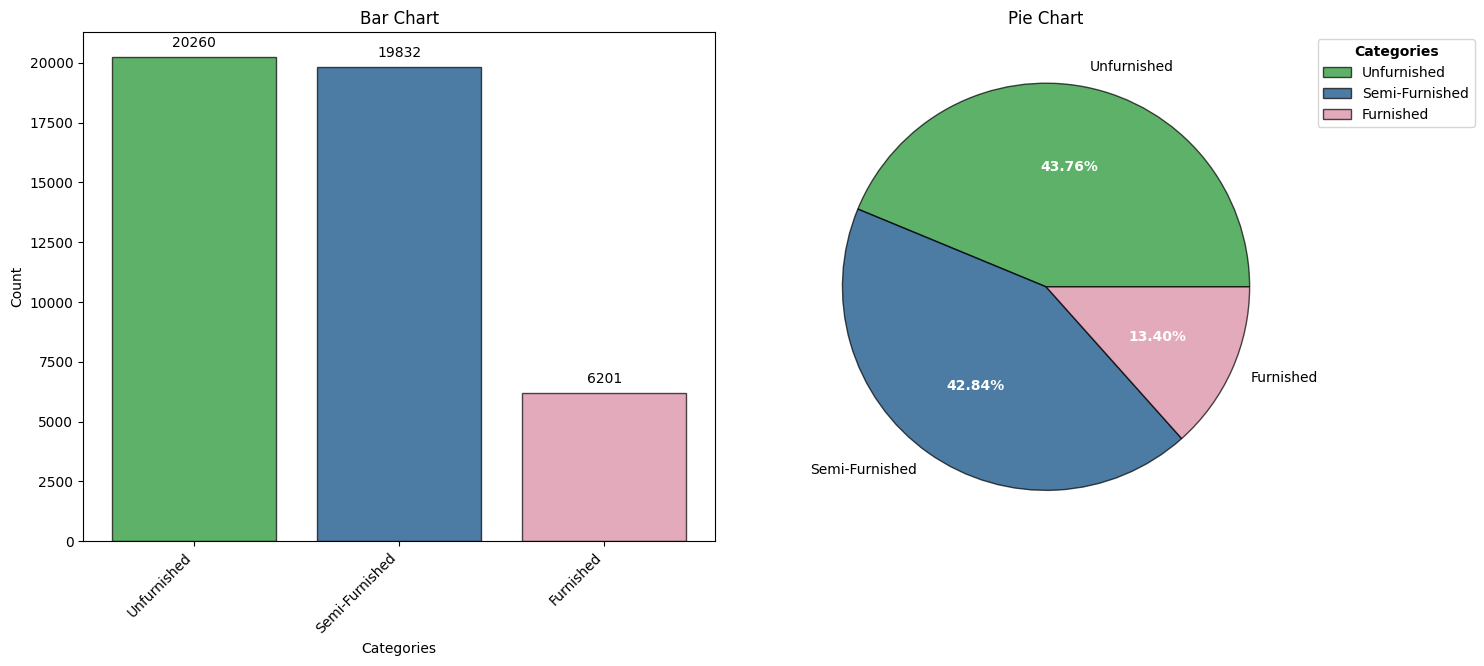

In [36]:
(
    houses
    .pipe(eda.cat_univar_plots,"furnishing",show_pie = True)
)

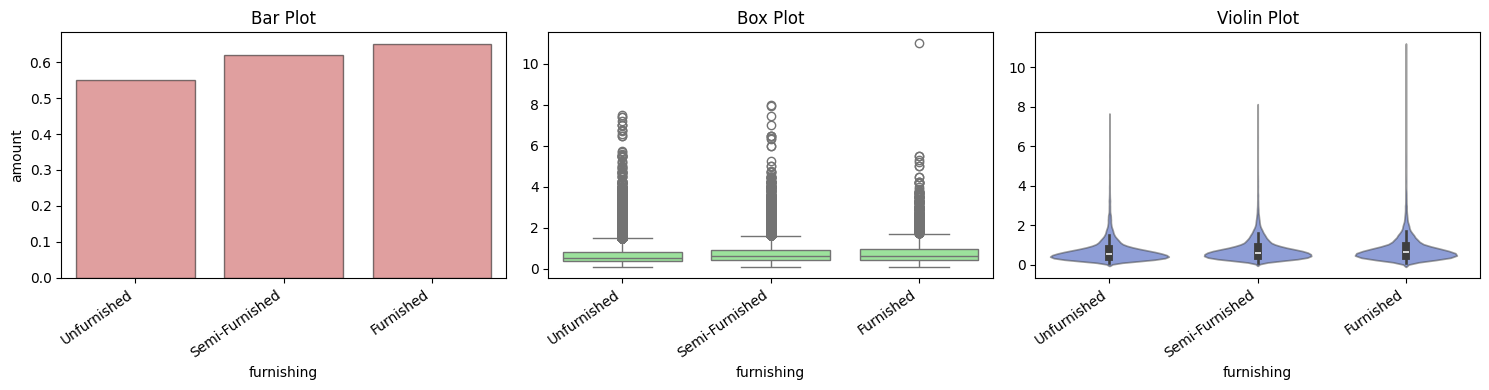

In [37]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","furnishing",estimator = "median")
)

In [38]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","furnishing")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 88.15479137985902
- p-value              : 6.13177567918153e-39
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and furnishing are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 428.8942728325889
- p-value              : 7.358545751791242e-94
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and furnishing are associated to each other


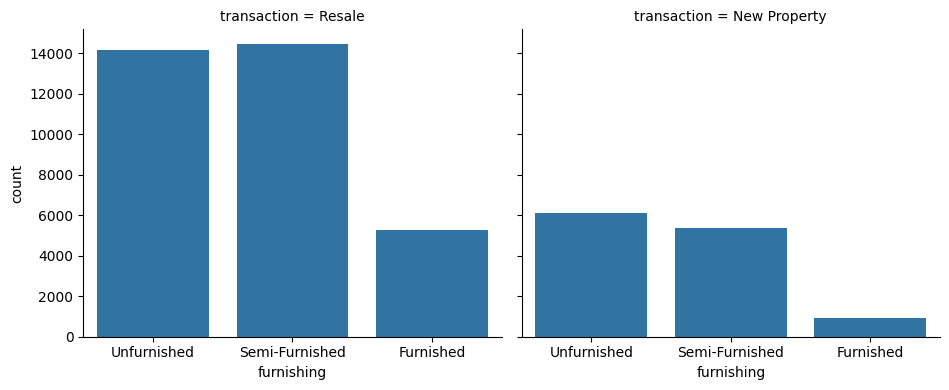

In [39]:
# relation of furnishing with transaction

grid = sns.FacetGrid(
    data = houses.loc[lambda df: df.transaction.isin(['Resale','New Property'])],
    col = "transaction",
    sharey = True,
    height = 4,
    aspect =1.2,
    col_order = ["Resale","New Property"],
    legend_out = True
)

grid.map_dataframe(sns.countplot, x="furnishing")
plt.show()

- In `Resale` category and `New Property` categories the most frequent furnishing status are different

### 7.5 `floor_num` and `num_floors`

In [40]:
houses.floor_num

0        8.0
1        2.0
2        5.0
3        2.0
4        3.0
        ... 
46903    4.0
46904    3.0
46905    8.0
46906    2.0
46907    NaN
Name: floor_num, Length: 46908, dtype: float64

In [41]:
(
    houses
    .pipe(eda.num_summary,"floor_num")
)

0        8.0
1        2.0
2        5.0
3        2.0
4        3.0
        ... 
46903    4.0
46904    3.0
46905    8.0
46906    2.0
46907    NaN
Name: floor_num, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 1,615 rows (3.44 %)
Available Data : 45,293 / 46,908 rows


value
percentile       
0             0.0
5             0.0
10            1.0
25            2.0
50            3.0
75            5.0
90            9.0
95           12.0
99           18.0
100          38.0

value
mean                4.081116
trimmed mean (5%)   4.031645
trimmed mean (10%)  3.686874
median              3.000000

value
var            14.573258
std             3.817494
IQR             3.000000
mad             2.000000
coef_variance   0.935404

value
skewness  2.036611
kurtosis  5.757662

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.218038873004357e-112
Test Statistic       : 0.8048691652639545
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 2462.5737613415913
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


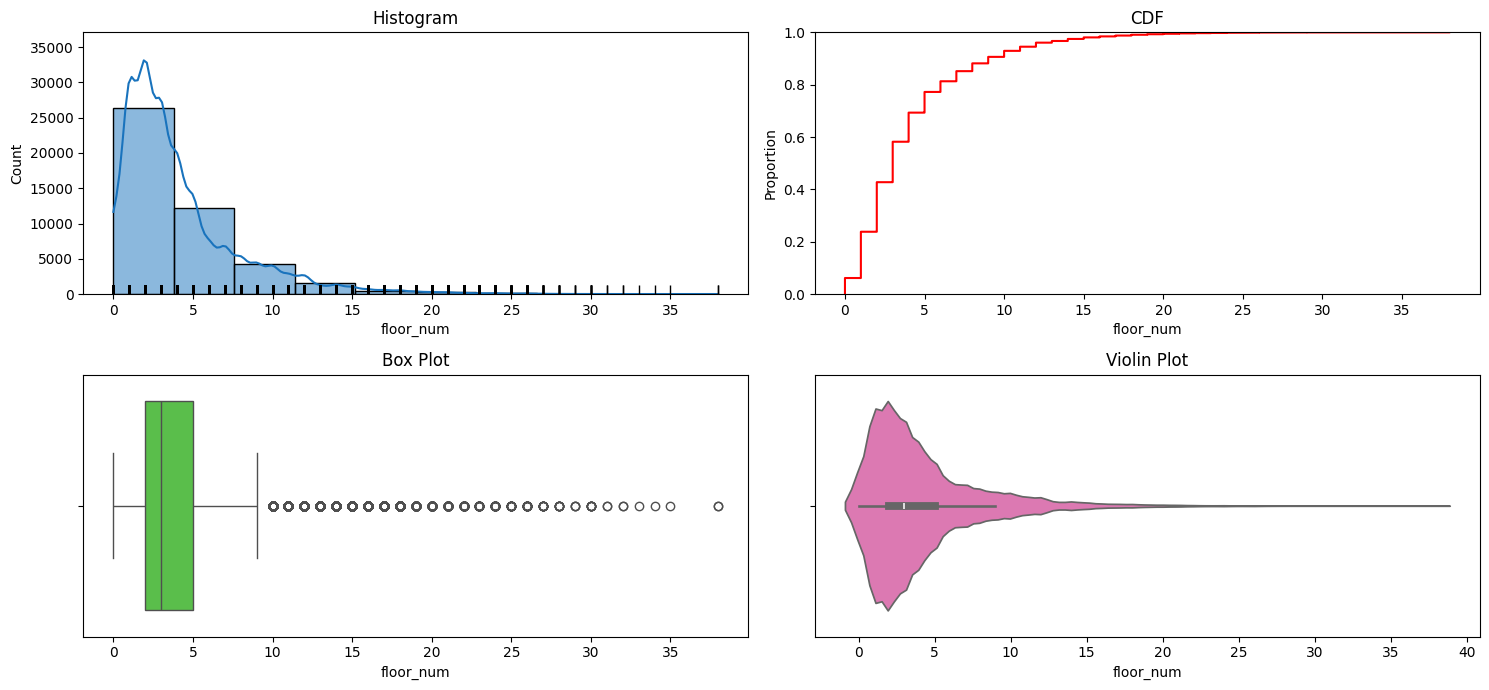

In [42]:
(
    houses
    .pipe(eda.num_univar_plots,"floor_num")
)

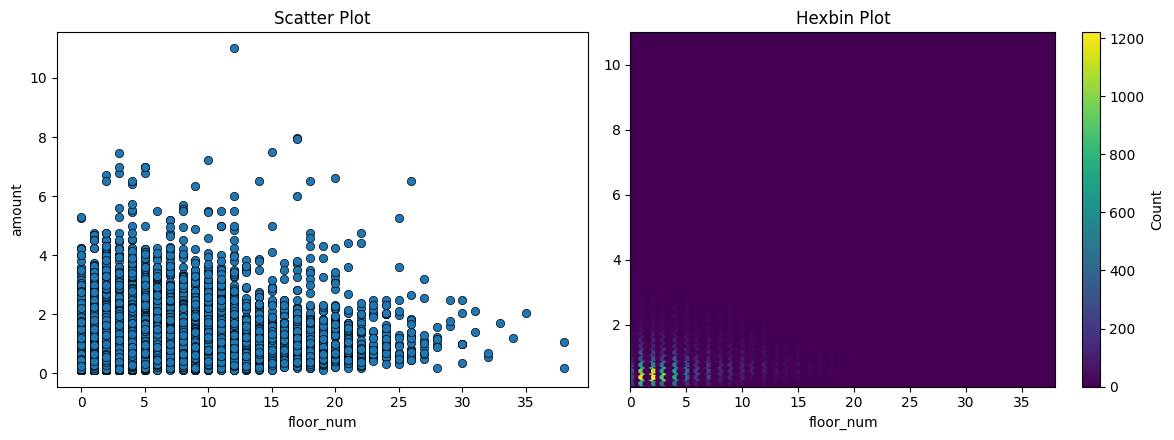

In [43]:
(
    houses
    .pipe(eda.num_bivar_plots,"floor_num","amount")
)

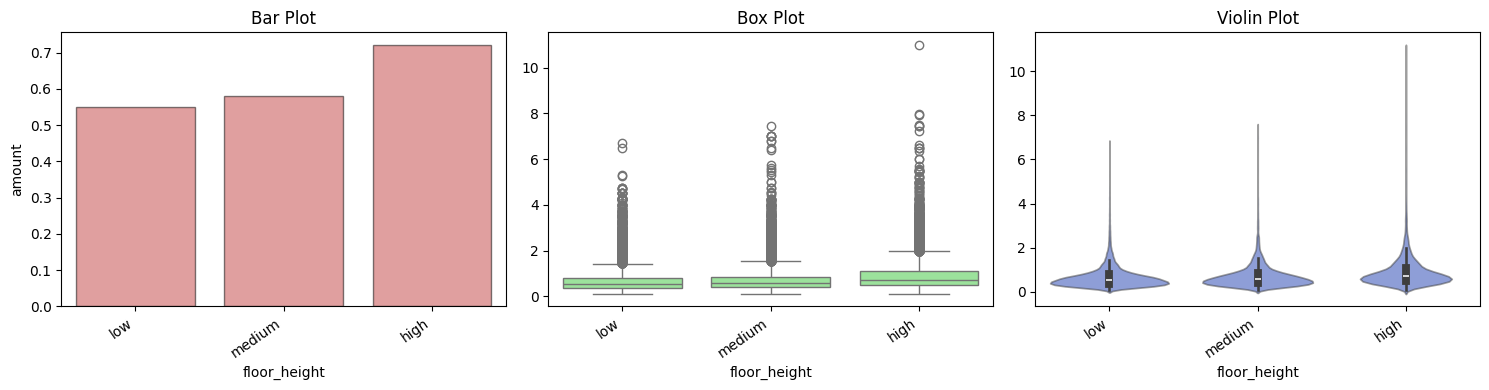

In [44]:
# binning floor heights

(
    houses
    .assign(
        floor_height = lambda df:(
            np.select(
                [
                    df.floor_num.between(0,3,inclusive = "left"),
                    df.floor_num.between(3,6,inclusive = "left")
                ],
                ["low","medium"],
                default = "high"
            )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","floor_height",estimator = "median")
)

In [45]:
(
    houses
    .assign(
        floor_height = lambda df:(
            np.select(
                [
                    df.floor_num.between(0,3,inclusive = "left"),
                    df.floor_num.between(3,6,inclusive = "left")
                ],
                ["low","medium"],
                default = "high"
            )
        )
    )
    .pipe(eda.num_cat_hyp_testing,"amount","floor_height")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 669.2937749521205
- p-value              : 2.510530146694499e-287
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and floor_height are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1753.1472114554063
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and floor_height are associated to each other


In [46]:
(
    houses
    .pipe(eda.num_summary,"num_floors")
)

0         8.0
1         4.0
2        10.0
3         4.0
4         3.0
         ... 
46903     9.0
46904     5.0
46905     9.0
46906     3.0
46907     NaN
Name: num_floors, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 1,647 rows (3.51 %)
Available Data : 45,261 / 46,908 rows


value
percentile       
0             1.0
5             3.0
10            3.0
25            4.0
50            5.0
75           12.0
90           16.0
95           20.0
99           27.0
100          88.0

value
mean                8.049005
trimmed mean (5%)   8.043275
trimmed mean (10%)  7.530324
median              5.000000

value
var            34.341434
std             5.860156
IQR             8.000000
mad             2.000000
coef_variance   0.728060

value
skewness  1.597029
kurtosis  4.091265

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.913044188375428e-108
Test Statistic       : 0.8315889370990096
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 2501.1841565624127
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


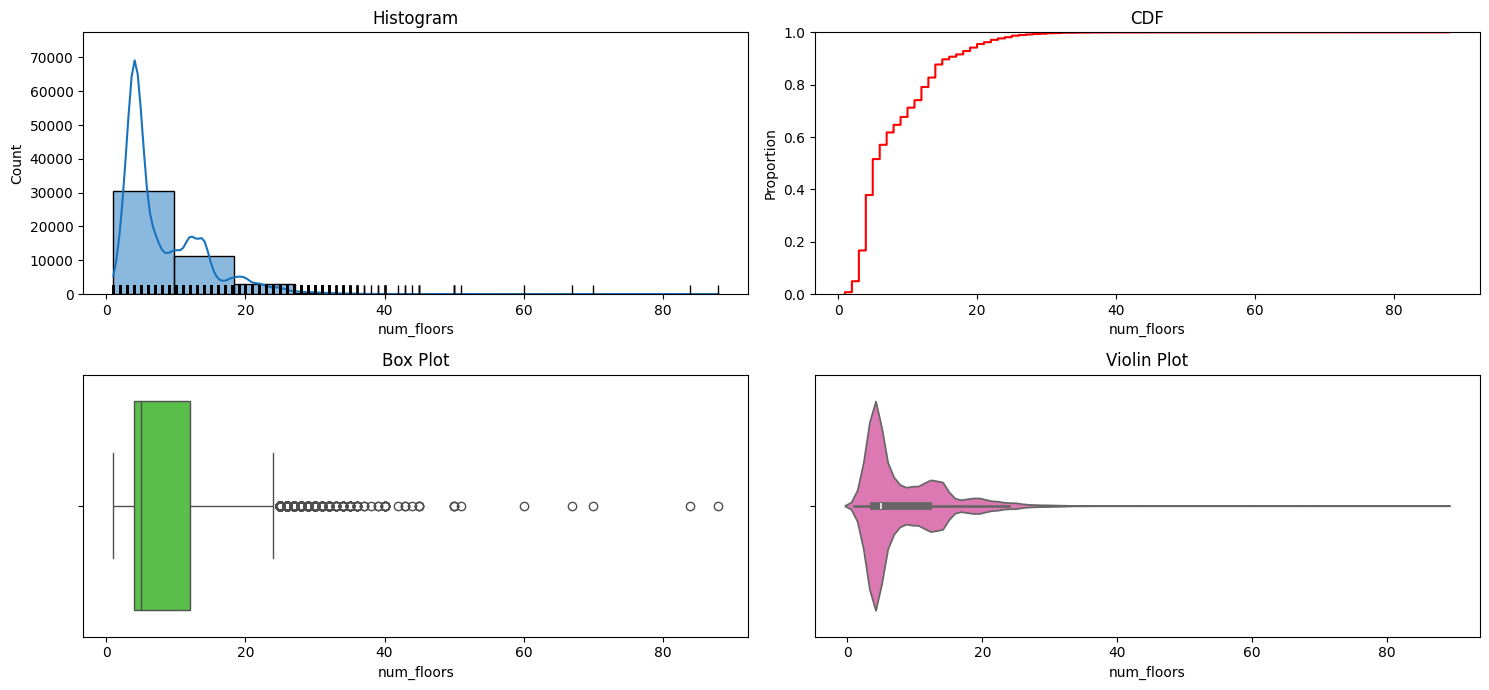

In [47]:
(
    houses
    .pipe(eda.num_univar_plots,"num_floors")
)

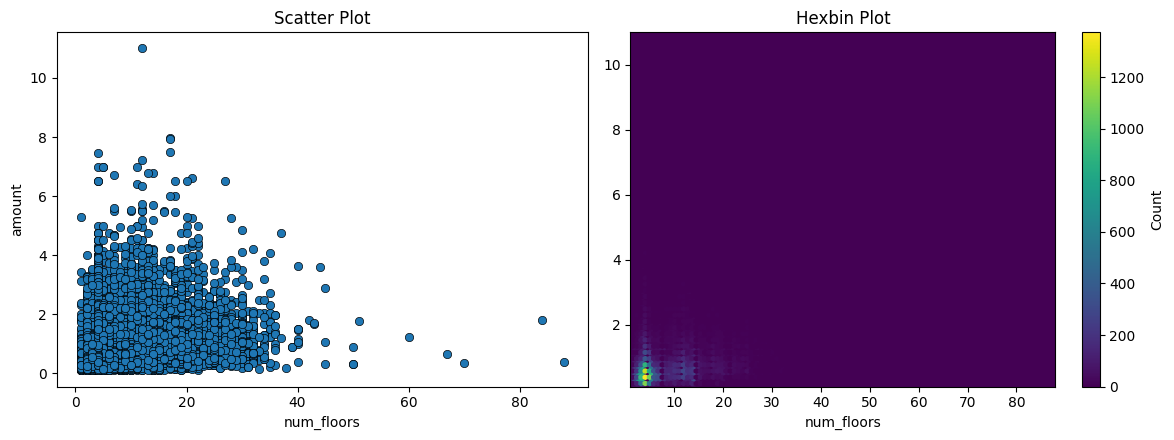

In [48]:
# num_floors

(
    houses
    .pipe(eda.num_bivar_plots,"num_floors","amount")
)

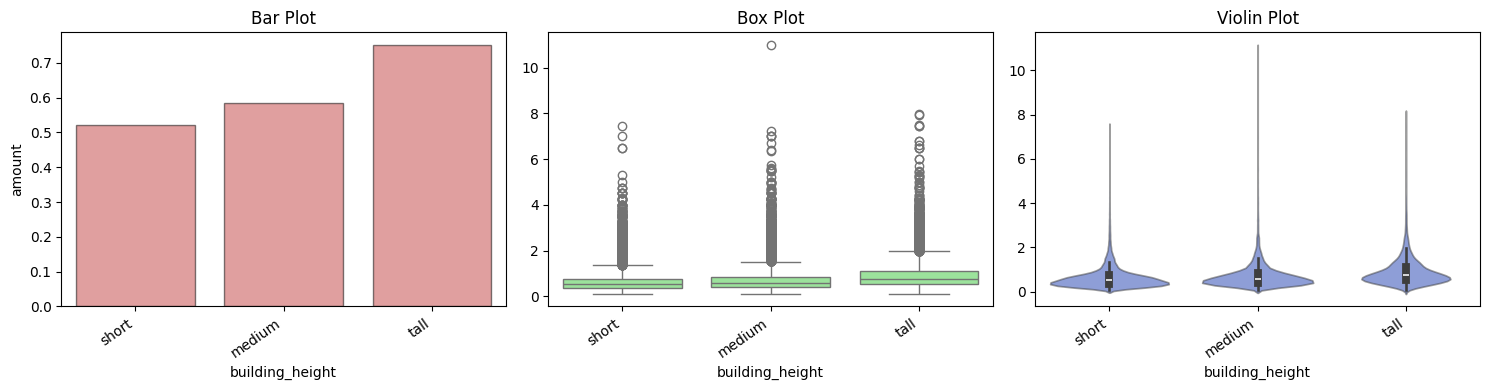

In [49]:
# binning building heights
(
    houses
    .assign(
        building_height = lambda df:(
            np.select(
                [
                    (df.num_floors.between(0,5, inclusive = "left")),
                    (df.num_floors.between(5,13, inclusive = "left"))
                ],
                ["short","medium"],
                default = "tall"
            )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","building_height",estimator = "median")
)

In [50]:
(
    houses
    .assign(
        building_height = lambda df:(
            np.select(
                [
                    (df.num_floors.between(0,5, inclusive = "left")),
                    (df.num_floors.between(5,13, inclusive = "left"))
                ],
                ["short","medium"],
                default = "tall"
            )
        )
    )
    .pipe(eda.num_cat_hyp_testing,"amount","building_height")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 815.6042525784859
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and building_height are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2440.3829767072853
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and building_height are associated to each other


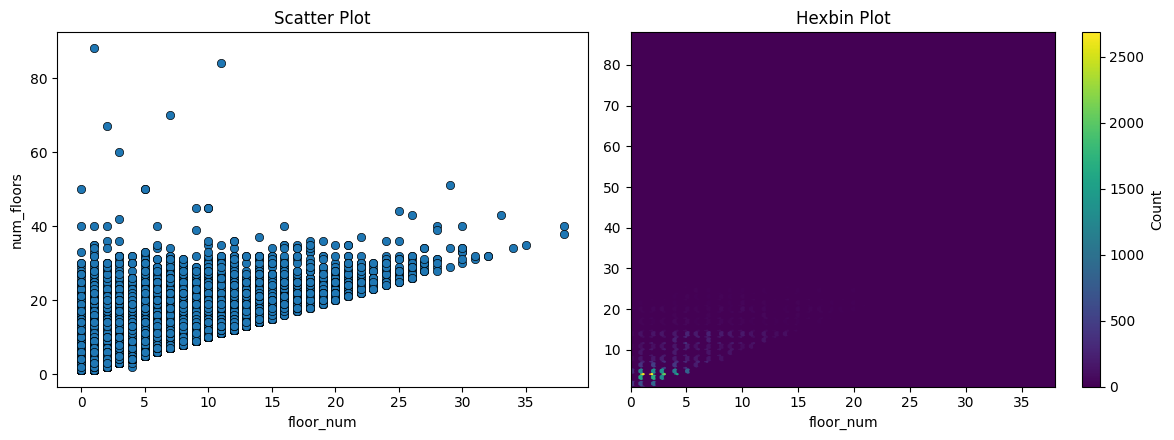

In [51]:
# relation between num_floors and floor_num

(
    houses
    .pipe(eda.num_bivar_plots,"floor_num","num_floors")
)

### 7.6 `location`

In [52]:
houses.location

0        greater-noida
1            mangalore
2                surat
3              gurgaon
4              gwalior
             ...      
46903        hyderabad
46904            surat
46905           mohali
46906           nagpur
46907          kolkata
Name: location, Length: 46908, dtype: object

In [53]:
(
    houses
    .pipe(eda.cat_summary,"location")
)

0        greater-noida
1            mangalore
2                surat
3              gurgaon
4              gwalior
             ...      
46903        hyderabad
46904            surat
46905           mohali
46906           nagpur
46907          kolkata
Name: location, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 81 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


count       46908
unique         81
top     faridabad
freq         2416

count  percentage
category                        
faridabad       2416    5.150507
ahmedabad       2331    4.969302
greater-noida   2281    4.862710
jaipur          2249    4.794491
kolkata         2176    4.638868
bangalore       1992    4.246610
chennai         1969    4.197578
vadodara        1889    4.027032
hyderabad       1867    3.980131
surat           1858    3.960945
pune            1500    3.197749
visakhapatnam   1386    2.954720
gurgaon         1362    2.903556
zirakpur        1240    2.643472
mohali          1161    2.475058
chandigarh      1035    2.206447
new-delhi        997    2.125437
ranchi           896    1.910122
noida            865    1.844035
bhiwadi          852    1.816321
kochi            798    1.701202
dehradun         762    1.624456
ghaziabad        725    1.545579
lucknow          663    1.413405
goa              639    1.362241
sonipat          631    1.345186
guwahati         616    1.313209
patna            603    1.285495
kanpur           597    1.272704
jamshedpur       492    1.048862
coimbatore       468    0.997698
vijayawada       444    0.946534
raipur           400    0.852733
thane            370    0.788778
aurangabad       355    0.756801
kalyan           350    0.746141
agra             348    0.741878
palghar          343    0.731219
bhubaneswar      337    0.718428
mangalore        318    0.677923
siliguri         315    0.671527
nagpur           257    0.547881
badlapur         238    0.507376
guntur           215    0.458344
varanasi         210    0.447685
panchkula        196    0.417839
nashik           192    0.409312
navi-mumbai      169    0.360280
thrissur         157    0.334698
trivandrum       151    0.321907
ernakulam        145    0.309116
mysore           142    0.302720
haridwar         129    0.275006
gwalior          128    0.272875
allahabad        128    0.272875
ludhiana         124    0.264347
durgapur         124    0.264347
vapi             113    0.240897
indore           103    0.219579
udaipur          100    0.213183
jabalpur          97    0.206788
bhopal            97    0.206788
trichy            91    0.193997
rajahmundry       68    0.144965
tirupati          65    0.138569
mumbai            56    0.119383
bhiwandi          49    0.104460
udupi             45    0.095932
kozhikode         45    0.095932
jodhpur           44    0.093801
belgaum           44    0.093801
vrindavan         43    0.091669
shimla            43    0.091669
satara            42    0.089537
solapur           26    0.055428
palakkad          25    0.053296
pondicherry       25    0.053296
ahmadnagar        24    0.051164
navsari           23    0.049032
nellore           23    0.049032
madurai           16    0.034109

- There is very high cardinality
- Target Encoding is an option

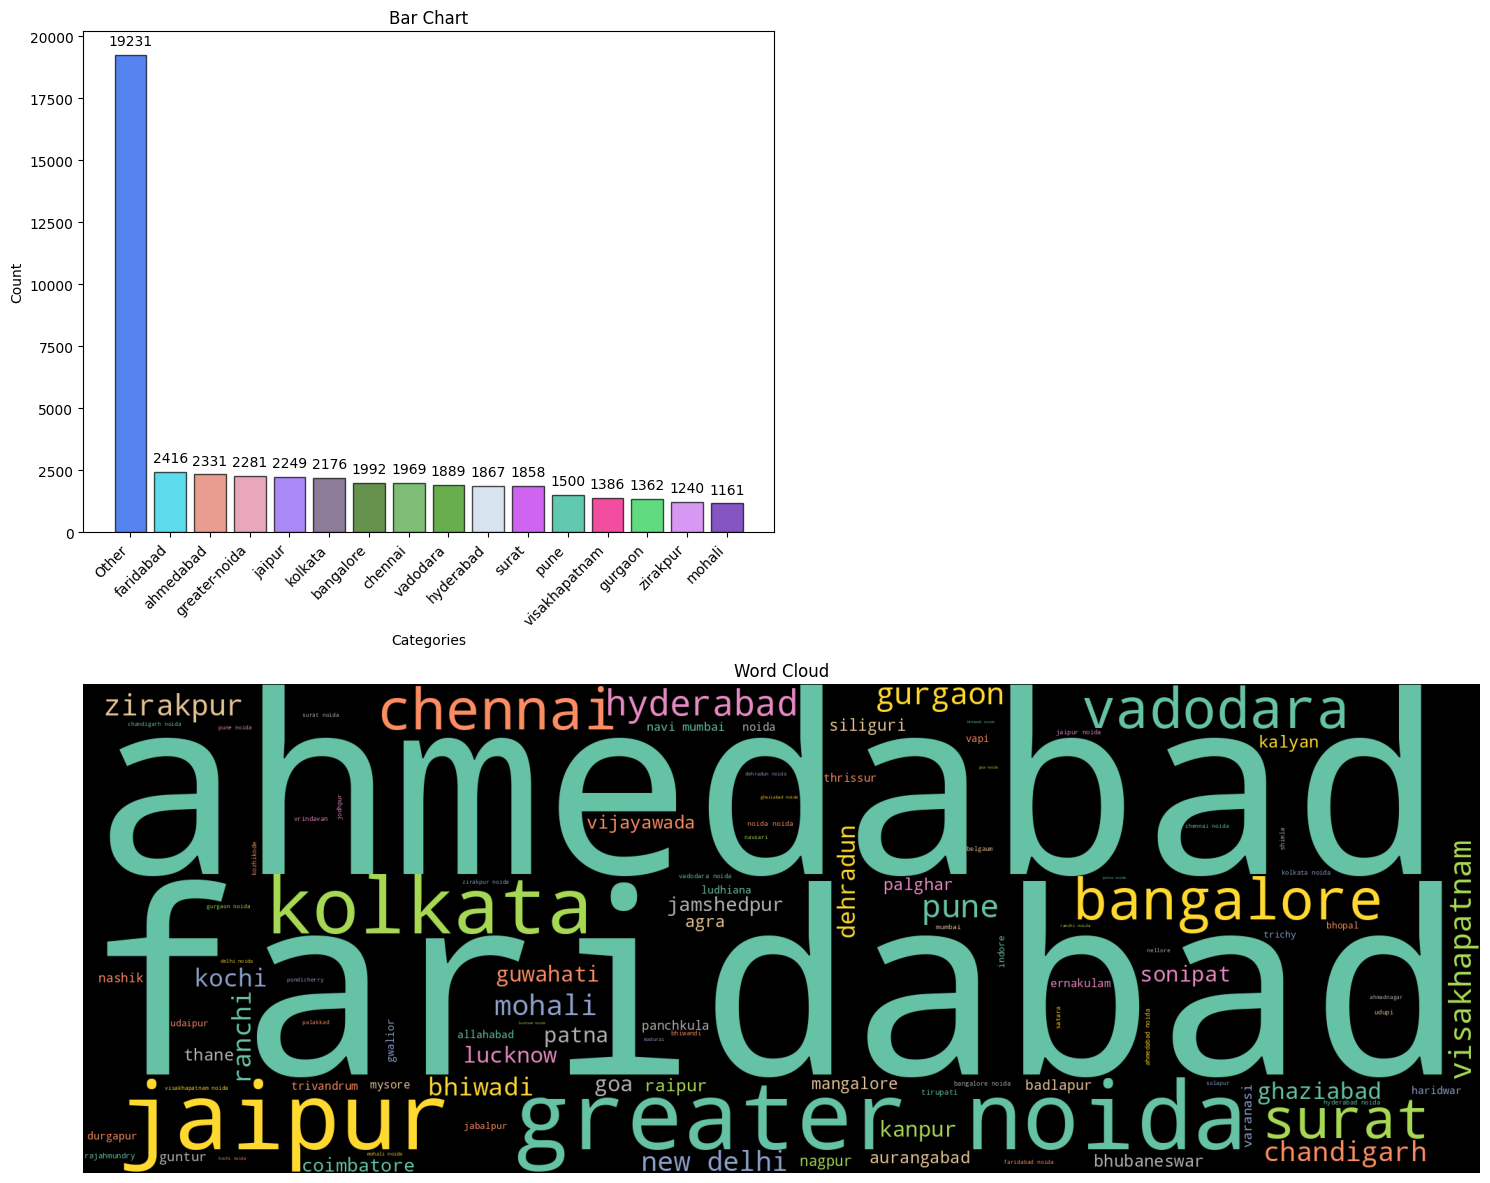

In [54]:
(
    houses
    .pipe(eda.cat_univar_plots,"location", figsize = (15,12), k = 15, show_wordcloud = True)
)

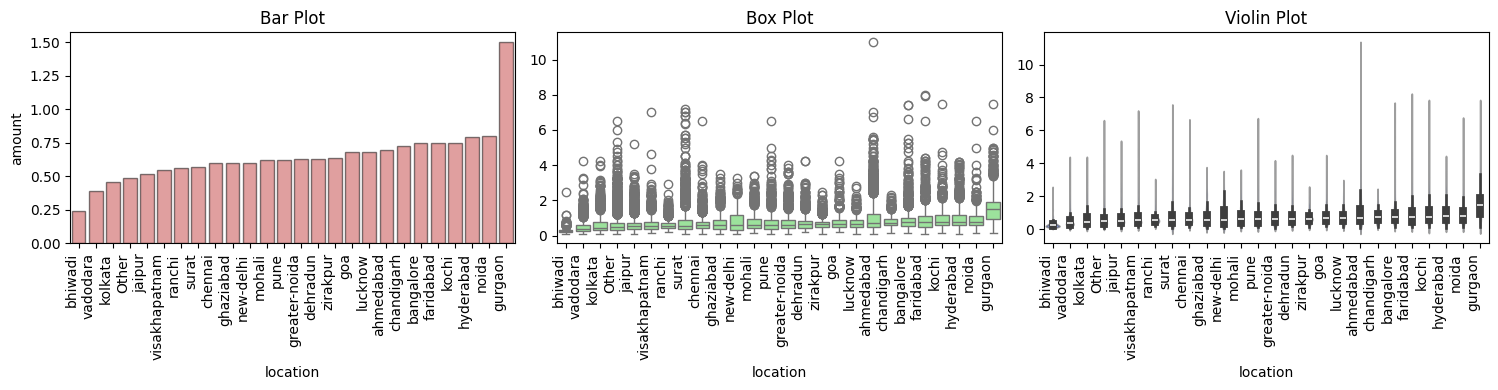

In [55]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","location",k = 25, estimator = "median",angle = 90)
)

### 7.7 `price`

In [56]:
houses.price

0        2923.0
1        3200.0
2        5236.0
3        9877.0
4        3600.0
          ...  
46903    6017.0
46904    2424.0
46905    2600.0
46906    5789.0
46907    3950.0
Name: price, Length: 46908, dtype: float64

In [57]:
(
    houses
    .pipe(eda.num_summary,"price")
)

0        2923.0
1        3200.0
2        5236.0
3        9877.0
4        3600.0
          ...  
46903    6017.0
46904    2424.0
46905    2600.0
46906    5789.0
46907    3950.0
Name: price, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


value
percentile          
0             204.00
5            2588.00
10           2960.00
25           3704.00
50           4771.00
75           6162.25
90           7808.00
95           8748.95
99           9799.00
100         10000.00

value
mean                5076.500064
trimmed mean (5%)   4996.717253
trimmed mean (10%)  4931.232653
median              4771.000000

value
var            3.369840e+06
std            1.835712e+03
IQR            2.458250e+03
mad            1.196000e+03
coef_variance  3.616098e-01

value
skewness  0.648695
kurtosis -0.144045

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.350693623220325e-73
Test Statistic       : 0.9615146032239172
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 522.4496611982249
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


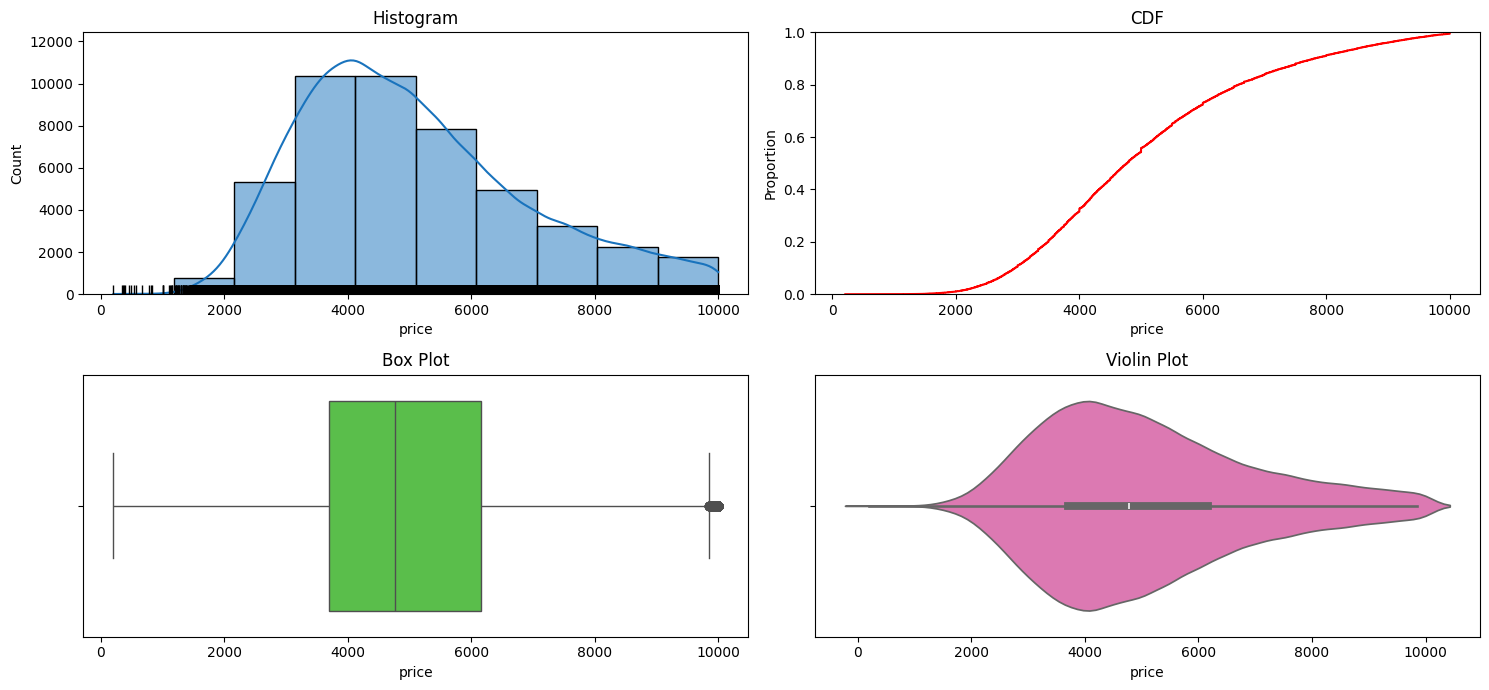

In [58]:
(
    houses
    .pipe(eda.num_univar_plots,"price")
)

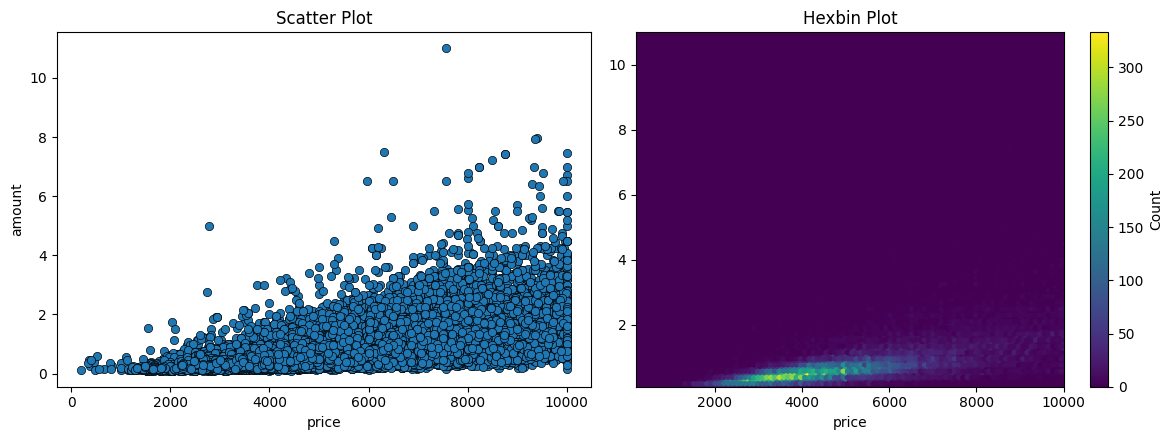

In [59]:
(
    houses
    .pipe(eda.num_bivar_plots,"price","amount")
)

In [60]:
(
    houses
    .pipe(eda.num_num_hyp_testing,"price","amount")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6559352487614785
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and amount are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7344795824102456
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and amount are correlated


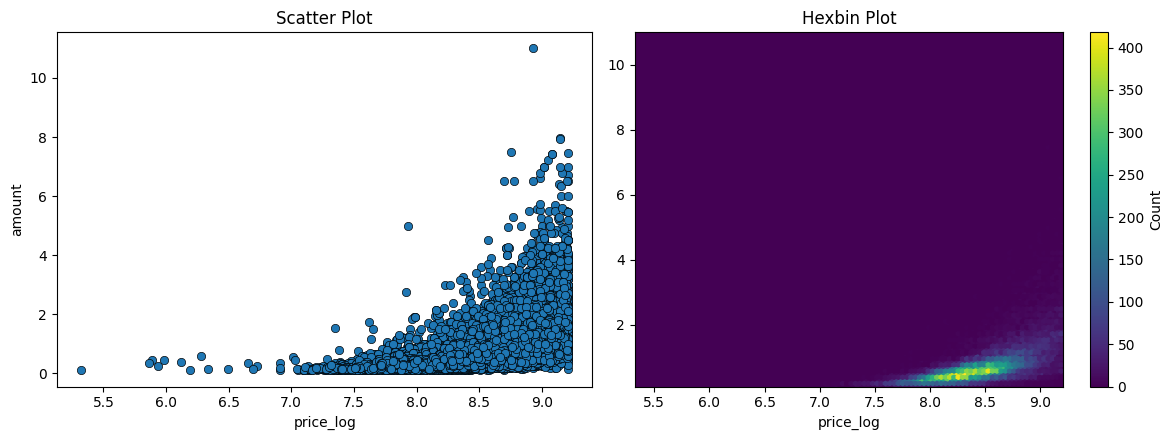

In [61]:
# log transformation
(
    houses
    .assign(
        price_log = lambda df:(
            np.log1p(df.price)
        )
    )
    .pipe(eda.num_bivar_plots,"price_log","amount")
)

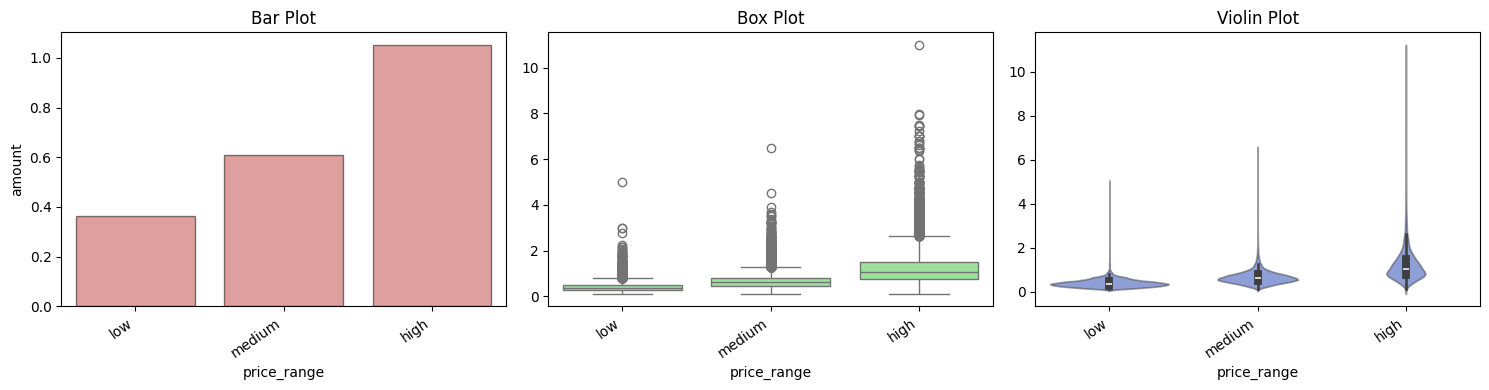

In [62]:
# binning
(
    houses
    .assign(
        price_range = lambda df:(
            np.select(
                [
                    df.price.between(0,4000,inclusive = "left"),
                    df.price.between(4000,6000,inclusive = "left")
                ],
                ["low","medium"],
                default = "high"
            )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","price_range",estimator = "median")
)

### 7.8 `balcony`

In [63]:
houses.balcony

0        6.0
1        1.0
2        4.0
3        3.0
4        1.0
        ... 
46903    1.0
46904    NaN
46905    NaN
46906    2.0
46907    NaN
Name: balcony, Length: 46908, dtype: float64

In [64]:
(
    houses
    .pipe(eda.num_summary,"balcony")
)

0        6.0
1        1.0
2        4.0
3        3.0
4        1.0
        ... 
46903    1.0
46904    NaN
46905    NaN
46906    2.0
46907    NaN
Name: balcony, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 12,185 rows (25.98 %)
Available Data : 34,723 / 46,908 rows


value
percentile       
0             0.0
5             0.0
10            1.0
25            1.0
50            2.0
75            3.0
90            3.0
95            4.0
99            4.0
100          10.0

value
mean                1.860928
trimmed mean (5%)        NaN
trimmed mean (10%)       NaN
median              2.000000

value
var            1.069449
std            1.034142
IQR            2.000000
mad            1.000000
coef_variance  0.555713

value
skewness  0.296702
kurtosis -0.046795

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.4889521383302304e-85
Test Statistic       : 0.9129492755563617
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1365.8420016622185
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


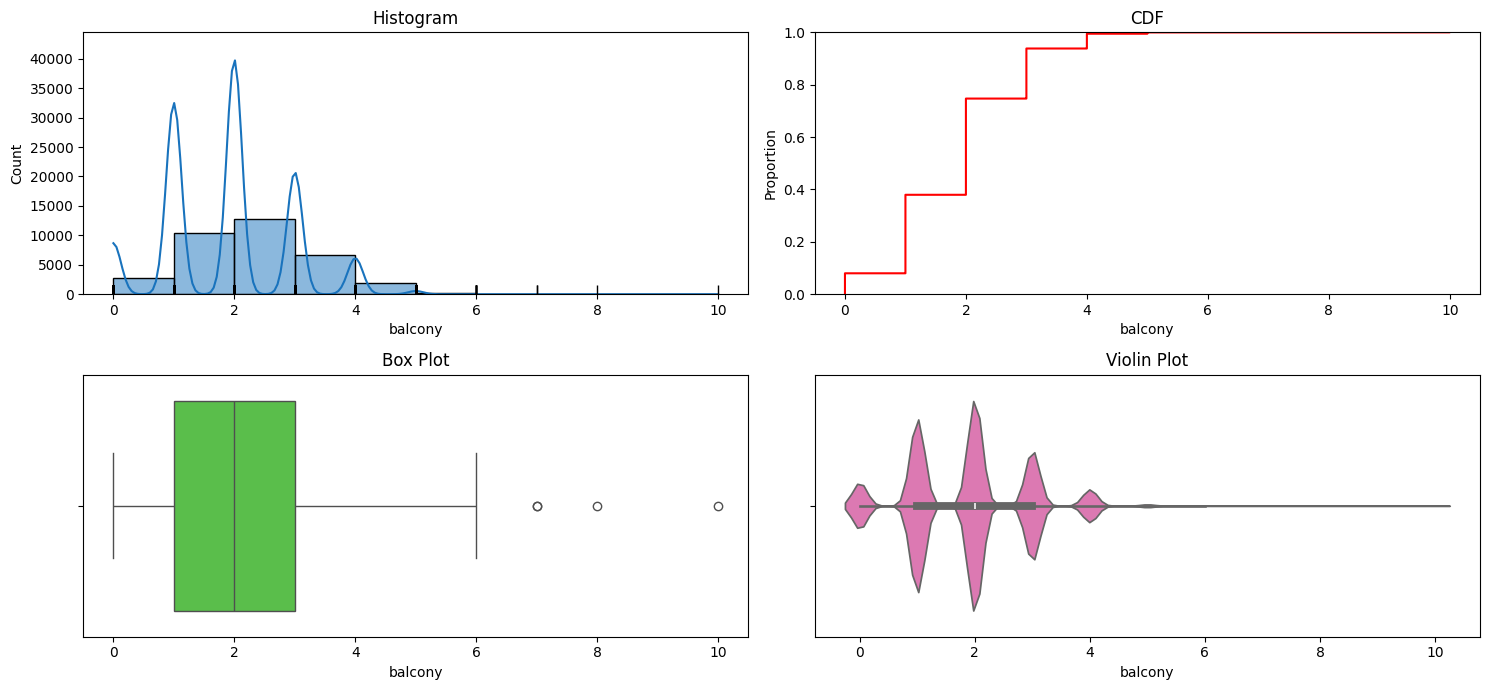

In [65]:
(
    houses
    .pipe(eda.num_univar_plots,"balcony")
)

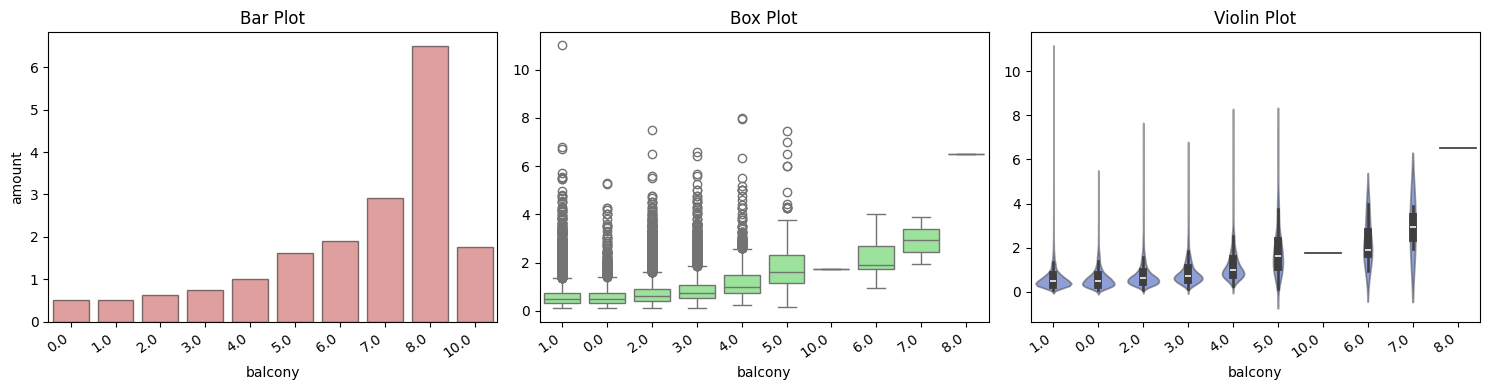

In [66]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","balcony",estimator = "median")
)

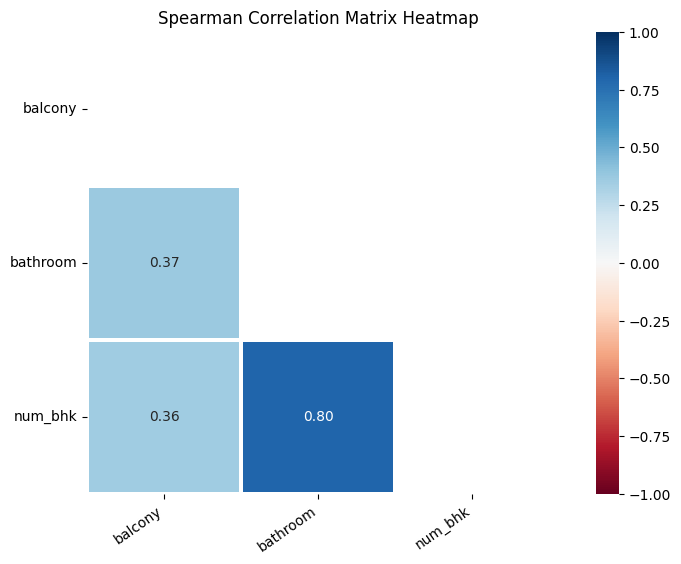

In [67]:
(
    houses[["balcony","bathroom","num_bhk"]]
    .pipe(eda.correlation_heatmap)
)

### 7.9 `ownership`

In [114]:
houses.ownership

0        Leasehold
1              NaN
2         Freehold
3         Freehold
4              NaN
           ...    
46903     Freehold
46904          NaN
46905          NaN
46906     Freehold
46907          NaN
Name: ownership, Length: 46908, dtype: object

In [115]:
(
    houses
    .pipe(eda.cat_summary,"ownership")
)

0        Leasehold
1              NaN
2         Freehold
3         Freehold
4              NaN
           ...    
46903     Freehold
46904          NaN
46905          NaN
46906     Freehold
46907          NaN
Name: ownership, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 17,545 rows (37.40 %)
Available Data : 29,363 / 46,908 rows


count      29363
unique         4
top     Freehold
freq       25378

count  percentage
category                               
Freehold              25378   86.428498
Leasehold              2222    7.567347
Co-operative Society   1422    4.842829
Power Of Attorney       341    1.161325

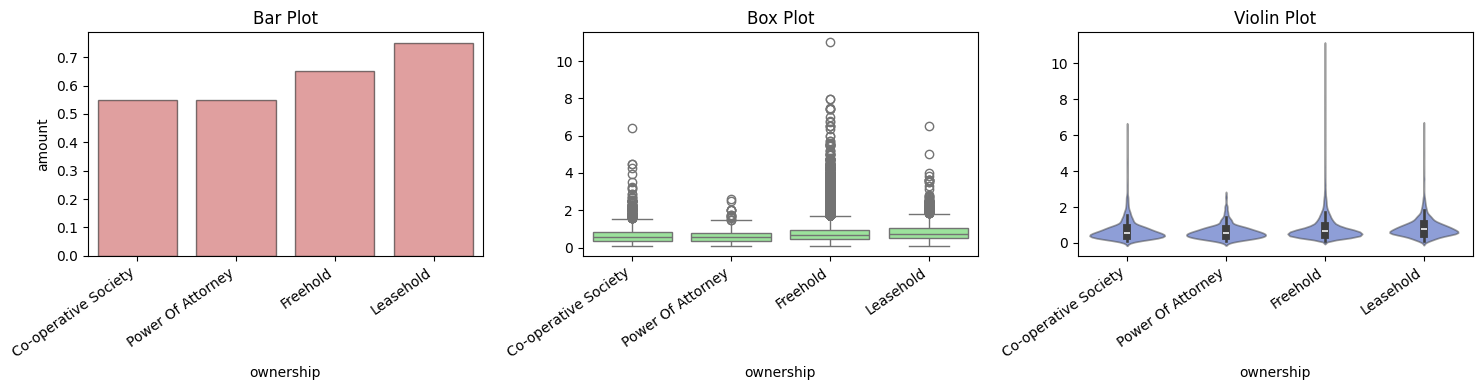

In [116]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","ownership",estimator = "median")
)

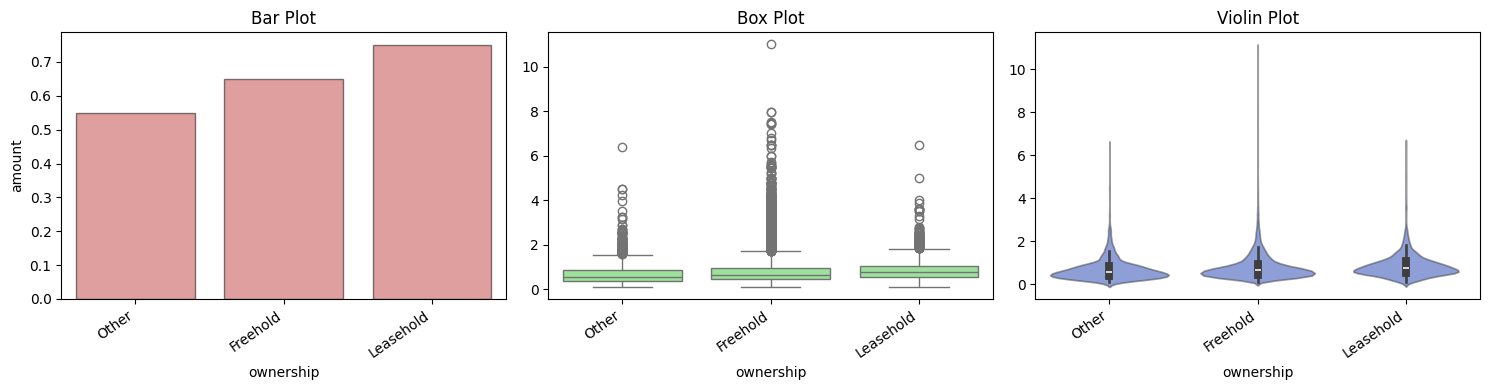

In [117]:
(
    houses
    .assign(
        ownership = lambda df:(
            np.where(
                df.ownership.str.contains("hold"),
                df.ownership,
                "Other"
            )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","ownership",estimator = "median")
)

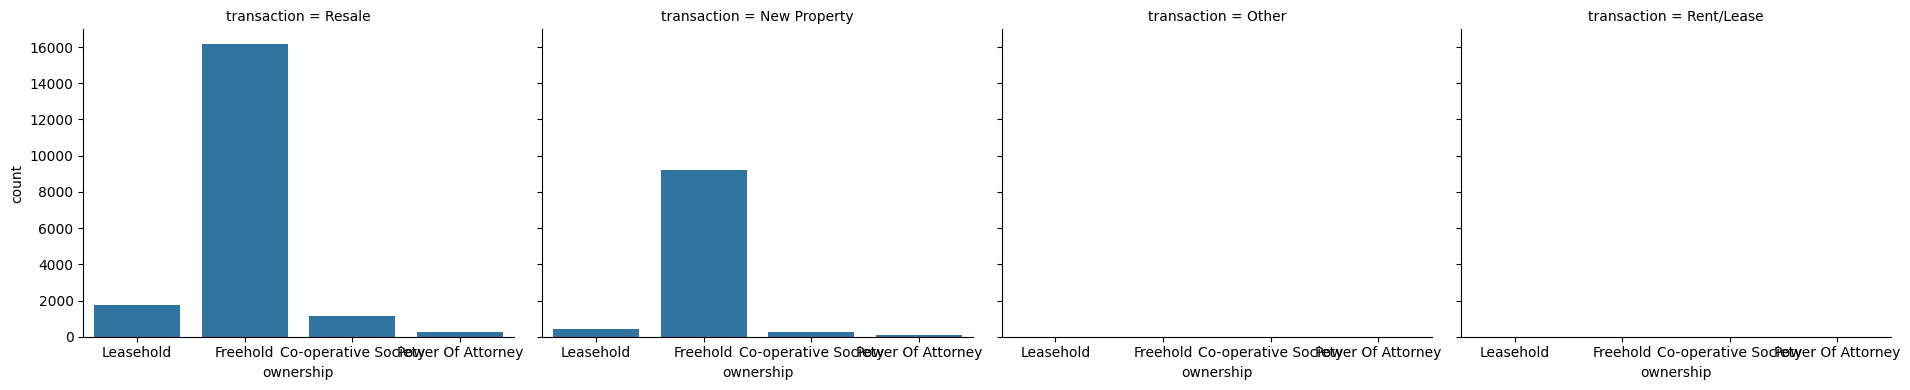

In [118]:
# relation of ownership with transaction

grid = sns.FacetGrid(
    data = houses,
    col = "transaction",
    sharey = True,
    height = 4,
    aspect =1.2,
    col_order = ["Resale","New Property","Other","Rent/Lease"],
    legend_out = True
)

grid.map_dataframe(sns.countplot, x="ownership")

plt.show()

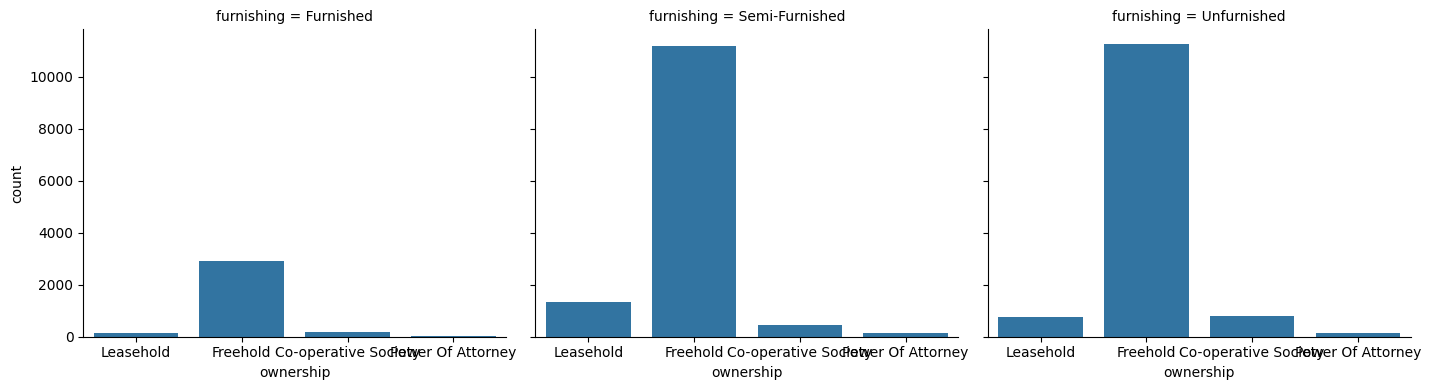

In [119]:
# relation of ownership with furnishing

grid = sns.FacetGrid(
    data = houses,
    col = "furnishing",
    sharey = True,
    height = 4,
    aspect =1.2,
    col_order = ["Furnished","Semi-Furnished","Unfurnished"],
    legend_out = True
)

grid.map_dataframe(sns.countplot, x="ownership")
plt.show()

In [121]:
(
    houses
    .loc[lambda df: df.ownership.isnull()]
    .describe()
)

amount  carpet_area      bathroom      balcony    super_area  \
count  17545.000000  3916.000000  17545.000000  6837.000000  13629.000000   
mean       0.628320  1016.872167      2.173668     1.489396   1252.075099   
std        0.471544   496.750905      0.756784     1.031148    629.993603   
min        0.100000    90.000000      1.000000     0.000000    150.000000   
25%        0.350000   700.000000      2.000000     1.000000    892.000000   
50%        0.517000   950.000000      2.000000     1.000000   1152.000000   
75%        0.750000  1200.000000      3.000000     2.000000   1490.000000   
max        7.210000  9000.000000     10.000000     5.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  17545.000000  17545.000000  16297.000000  16267.000000   
mean       2.337247      0.000342      3.679082      7.152210   
std        0.790876      0.018490      3.490094      5.185737   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      1.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      5.000000      9.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count         1158.000000           1158.000000       1158.000000   
mean             0.604491              0.734888          0.202073   
std              0.489171              0.441584          0.401720   
min              0.000000              0.000000          0.000000   
25%              0.000000              0.000000          0.000000   
50%              1.000000              1.000000          0.000000   
75%              1.000000              1.000000          0.000000   
max              1.000000              1.000000          1.000000   

       parking_spots         price  
count    1747.000000  17545.000000  
mean        2.931883   4880.734283  
std        28.304057   1754.623833  
min         1.000000    350.000000  
25%         1.000000   3571.000000  
50%         1.000000   4587.000000  
75%         1.000000   5909.000000  
max       605.000000  10000.000000

- Ownership is most probably missing completely at random

### 7.10 `facing`

In [122]:
houses.facing

0        North - East
1                 NaN
2                East
3                East
4                 NaN
             ...     
46903            East
46904             NaN
46905             NaN
46906            East
46907             NaN
Name: facing, Length: 46908, dtype: object

In [123]:
(
    houses
    .pipe(eda.cat_summary,"facing")
)

0        North - East
1                 NaN
2                East
3                East
4                 NaN
             ...     
46903            East
46904             NaN
46905             NaN
46906            East
46907             NaN
Name: facing, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 18,683 rows (39.83 %)
Available Data : 28,225 / 46,908 rows


count   28225
unique      8
top      East
freq    13256

count  percentage
category                       
East          13256   46.965456
North - East   5709   20.226749
North          3751   13.289637
West           2245    7.953942
South          1140    4.038973
South - East    882    3.124889
North - West    782    2.770593
South -West     460    1.629761

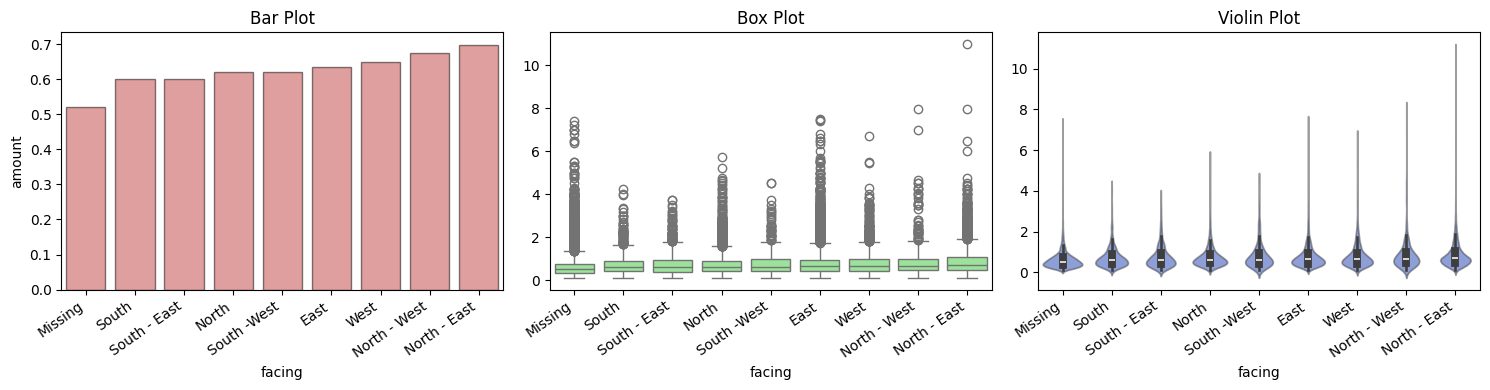

In [124]:
(
    houses
    .fillna("Missing")
    .pipe(eda.num_cat_bivar_plots,"amount","facing",estimator = "median")
)

In [125]:
(
    houses
    .loc[lambda df: df.facing.isnull()]
    .describe(include = "number")
)

amount  carpet_area      bathroom      balcony    super_area  \
count  18683.000000  4485.000000  18683.000000  7789.000000  14198.000000   
mean       0.638311  1034.613225      2.186961     1.522018   1261.226278   
std        0.489807   538.090940      0.766495     1.020556    642.719979   
min        0.100000    90.000000      1.000000     0.000000    150.000000   
25%        0.350000   706.000000      2.000000     1.000000    899.250000   
50%        0.520000   950.000000      2.000000     1.000000   1162.250600   
75%        0.757500  1220.000000      3.000000     2.000000   1500.000000   
max        7.430000  9255.000000     10.000000     5.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  18683.000000  18683.000000  17357.000000  17327.000000   
mean       2.347535      0.000375      3.727199      7.247129   
std        0.796512      0.019353      3.535675      5.249758   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      1.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      5.000000     10.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count         1841.000000           1841.000000       1841.000000   
mean             0.637154              0.665942          0.208582   
std              0.480952              0.471788          0.406406   
min              0.000000              0.000000          0.000000   
25%              0.000000              0.000000          0.000000   
50%              1.000000              1.000000          0.000000   
75%              1.000000              1.000000          0.000000   
max              1.000000              1.000000          1.000000   

       parking_spots         price  
count    2450.000000  18683.000000  
mean        4.203673   4898.896751  
std        28.388538   1765.233284  
min         1.000000    350.000000  
25%         1.000000   3571.000000  
50%         1.000000   4600.000000  
75%         1.000000   5937.500000  
max       506.000000  10000.000000

In [126]:
(
    houses
    .loc[lambda df: df.facing.isnull()]
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count       18683       18683        18086      0      2283          2450
unique         81           3            3      0         4             2
top     bangalore      Resale  Unfurnished    NaN  Freehold       Covered
freq         1118       16035         7836    NaN      1918          2078

- facing is completely missing at random not dependent on other features
- missing data has less median house amount

In [127]:
(
    houses
    .fillna("Missing")
    .pipe(eda.num_cat_hyp_testing,"amount","facing")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 136.61428230853963
- p-value              : 6.407710279624644e-228
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and facing are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1573.8198991919776
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and facing are associated to each other


### 7.11 `overlooking_garden`,`overlooking_mainroad`,`overlooking_pool`

In [128]:
houses[["overlooking_garden","overlooking_mainroad","overlooking_pool"]]

overlooking_garden  overlooking_mainroad  overlooking_pool
0                     1.0                   1.0               1.0
1                     NaN                   NaN               NaN
2                     1.0                   1.0               0.0
3                     NaN                   NaN               NaN
4                     NaN                   NaN               NaN
...                   ...                   ...               ...
46903                 1.0                   0.0               0.0
46904                 NaN                   NaN               NaN
46905                 NaN                   NaN               NaN
46906                 1.0                   0.0               0.0
46907                 NaN                   NaN               NaN

[46908 rows x 3 columns]

In [129]:
(
    houses
    .pipe(eda.cat_summary,"overlooking_garden")
)

0        1.0
1        NaN
2        1.0
3        NaN
4        NaN
        ... 
46903    1.0
46904    NaN
46905    NaN
46906    1.0
46907    NaN
Name: overlooking_garden, Length: 46908, dtype: float64

Data Type      : float64
Cardinality    : 2 categories
Missing Data   : 20,618 rows (43.95 %)
Available Data : 26,290 / 46,908 rows


count  26290.000000
mean       0.650970
std        0.476673
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

count  percentage
category                   
1.0       17114   65.096995
0.0        9176   34.903005

In [130]:
(
    houses
    .pipe(eda.cat_summary,"overlooking_mainroad")
)

0        1.0
1        NaN
2        1.0
3        NaN
4        NaN
        ... 
46903    0.0
46904    NaN
46905    NaN
46906    0.0
46907    NaN
Name: overlooking_mainroad, Length: 46908, dtype: float64

Data Type      : float64
Cardinality    : 2 categories
Missing Data   : 20,618 rows (43.95 %)
Available Data : 26,290 / 46,908 rows


count  26290.000000
mean       0.748878
std        0.433667
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

count  percentage
category                   
1.0       19688    74.88779
0.0        6602    25.11221

In [131]:
(
    houses
    .pipe(eda.cat_summary,"overlooking_pool")
)

0        1.0
1        NaN
2        0.0
3        NaN
4        NaN
        ... 
46903    0.0
46904    NaN
46905    NaN
46906    0.0
46907    NaN
Name: overlooking_pool, Length: 46908, dtype: float64

Data Type      : float64
Cardinality    : 2 categories
Missing Data   : 20,618 rows (43.95 %)
Available Data : 26,290 / 46,908 rows


count  26290.000000
mean       0.224952
std        0.417559
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

count  percentage
category                   
0.0       20376   77.504755
1.0        5914   22.495245

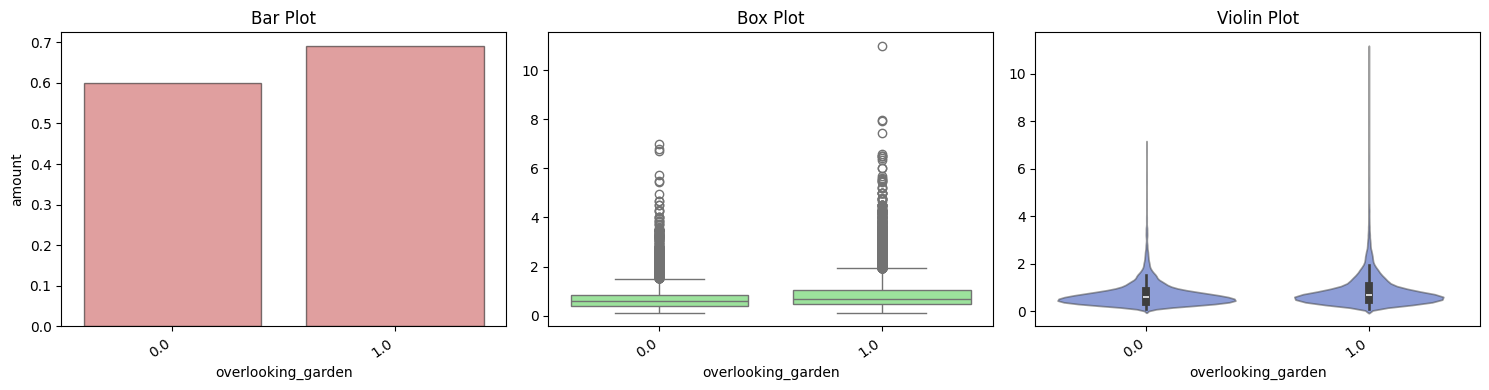

In [132]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","overlooking_garden",estimator = "median")
)

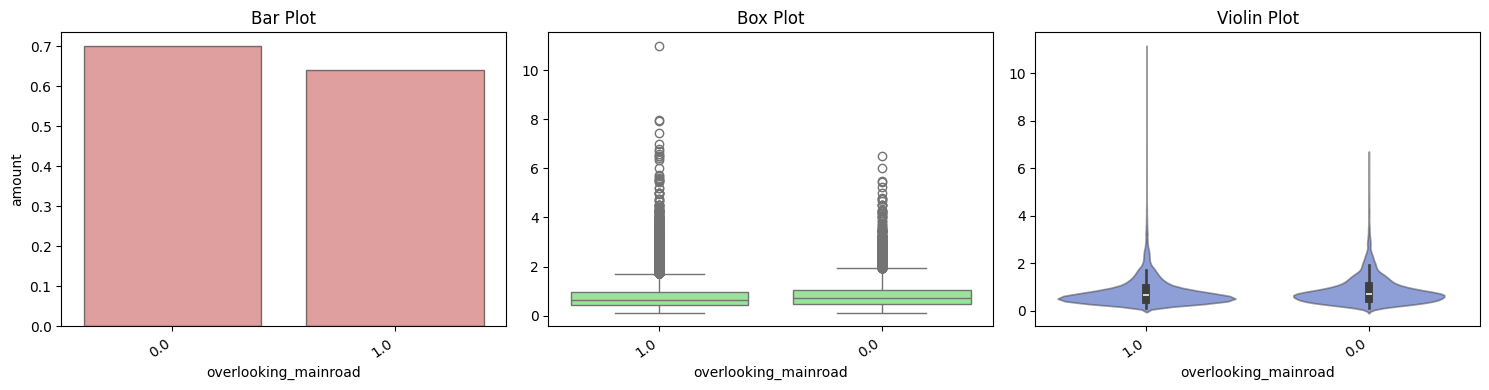

In [133]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","overlooking_mainroad",estimator = "median")
)

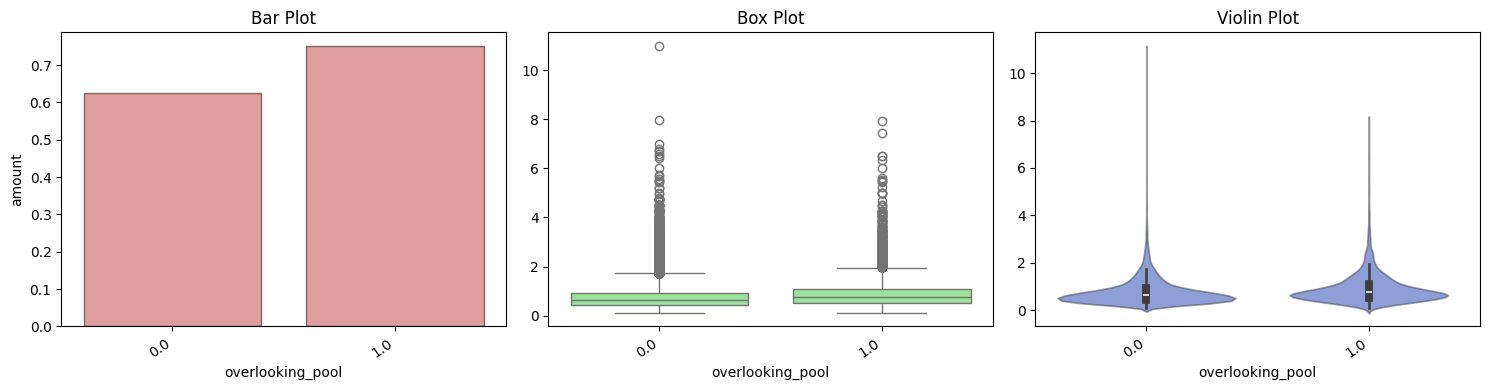

In [134]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","overlooking_pool",estimator = "median")
)

In [135]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","overlooking_garden")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 323.73517724053204
- p-value              : 6.015959705499233e-72
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_garden are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 359.8198334995117
- p-value              : 3.0818728996335835e-80
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_garden are associated to each other


In [136]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","overlooking_mainroad")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 51.8811789779237
- p-value              : 6.054883252797472e-13
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_mainroad are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 101.10024647864829
- p-value              : 8.74440103148421e-24
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_mainroad are associated to each other


In [137]:
(
    houses
    .pipe(eda.num_cat_hyp_testing,"amount","overlooking_pool")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 246.91304952304083
- p-value              : 2.1862459963058432e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_pool are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 408.93322352530856
- p-value              : 6.256580533007909e-91
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables amount and overlooking_pool are associated to each other


In [138]:
(
    houses
    .loc[lambda df: df.overlooking_garden.isnull()]
    .describe()
)

amount  carpet_area      bathroom      balcony    super_area  \
count  20618.000000  5728.000000  20618.000000  9522.000000  14890.000000   
mean       0.642677  1048.512965      2.186536     1.524680   1255.773689   
std        0.494141   560.379273      0.761027     1.003549    638.130812   
min        0.100000    90.000000      1.000000     0.000000    150.000000   
25%        0.350000   748.750000      2.000000     1.000000    892.000000   
50%        0.520000   960.000000      2.000000     1.000000   1150.000000   
75%        0.760000  1228.000000      3.000000     2.000000   1495.000000   
max        7.500000  9795.000000     10.000000     5.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  20618.000000  20618.000000  19301.000000  19272.000000   
mean       2.354593      0.000291      3.588052      6.946088   
std        0.792069      0.017057      3.417583      5.102646   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      1.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      4.000000      9.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count                 0.0                   0.0               0.0   
mean                  NaN                   NaN               NaN   
std                   NaN                   NaN               NaN   
min                   NaN                   NaN               NaN   
25%                   NaN                   NaN               NaN   
50%                   NaN                   NaN               NaN   
75%                   NaN                   NaN               NaN   
max                   NaN                   NaN               NaN   

       parking_spots         price  
count    3457.000000  20618.000000  
mean        4.282326   4926.947667  
std        30.552638   1767.948667  
min         1.000000    350.000000  
25%         1.000000   3600.000000  
50%         1.000000   4630.000000  
75%         1.000000   5959.000000  
max       605.000000  10000.000000

In [139]:
(
    houses
    .loc[lambda df: df.overlooking_garden.isnull()]
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count       20618       20618        20015   3776      4231          3457
unique         81           3            3      8         4             2
top     bangalore      Resale  Unfurnished   East  Freehold       Covered
freq         1246       17635         8782   1761      3752          2908

In [140]:
(
    houses
    .loc[lambda df: df.overlooking_mainroad.isnull()]
    .describe()
)

amount  carpet_area      bathroom      balcony    super_area  \
count  20618.000000  5728.000000  20618.000000  9522.000000  14890.000000   
mean       0.642677  1048.512965      2.186536     1.524680   1255.773689   
std        0.494141   560.379273      0.761027     1.003549    638.130812   
min        0.100000    90.000000      1.000000     0.000000    150.000000   
25%        0.350000   748.750000      2.000000     1.000000    892.000000   
50%        0.520000   960.000000      2.000000     1.000000   1150.000000   
75%        0.760000  1228.000000      3.000000     2.000000   1495.000000   
max        7.500000  9795.000000     10.000000     5.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  20618.000000  20618.000000  19301.000000  19272.000000   
mean       2.354593      0.000291      3.588052      6.946088   
std        0.792069      0.017057      3.417583      5.102646   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      1.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      4.000000      9.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count                 0.0                   0.0               0.0   
mean                  NaN                   NaN               NaN   
std                   NaN                   NaN               NaN   
min                   NaN                   NaN               NaN   
25%                   NaN                   NaN               NaN   
50%                   NaN                   NaN               NaN   
75%                   NaN                   NaN               NaN   
max                   NaN                   NaN               NaN   

       parking_spots         price  
count    3457.000000  20618.000000  
mean        4.282326   4926.947667  
std        30.552638   1767.948667  
min         1.000000    350.000000  
25%         1.000000   3600.000000  
50%         1.000000   4630.000000  
75%         1.000000   5959.000000  
max       605.000000  10000.000000

In [141]:
(
    houses
    .loc[lambda df: df.overlooking_mainroad.isnull()]
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count       20618       20618        20015   3776      4231          3457
unique         81           3            3      8         4             2
top     bangalore      Resale  Unfurnished   East  Freehold       Covered
freq         1246       17635         8782   1761      3752          2908

In [142]:
(
    houses
    .loc[lambda df: df.overlooking_pool.isnull()]
    .describe()
)

amount  carpet_area      bathroom      balcony    super_area  \
count  20618.000000  5728.000000  20618.000000  9522.000000  14890.000000   
mean       0.642677  1048.512965      2.186536     1.524680   1255.773689   
std        0.494141   560.379273      0.761027     1.003549    638.130812   
min        0.100000    90.000000      1.000000     0.000000    150.000000   
25%        0.350000   748.750000      2.000000     1.000000    892.000000   
50%        0.520000   960.000000      2.000000     1.000000   1150.000000   
75%        0.760000  1228.000000      3.000000     2.000000   1495.000000   
max        7.500000  9795.000000     10.000000     5.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  20618.000000  20618.000000  19301.000000  19272.000000   
mean       2.354593      0.000291      3.588052      6.946088   
std        0.792069      0.017057      3.417583      5.102646   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      1.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      4.000000      9.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count                 0.0                   0.0               0.0   
mean                  NaN                   NaN               NaN   
std                   NaN                   NaN               NaN   
min                   NaN                   NaN               NaN   
25%                   NaN                   NaN               NaN   
50%                   NaN                   NaN               NaN   
75%                   NaN                   NaN               NaN   
max                   NaN                   NaN               NaN   

       parking_spots         price  
count    3457.000000  20618.000000  
mean        4.282326   4926.947667  
std        30.552638   1767.948667  
min         1.000000    350.000000  
25%         1.000000   3600.000000  
50%         1.000000   4630.000000  
75%         1.000000   5959.000000  
max       605.000000  10000.000000

In [143]:
(
    houses
    .loc[lambda df: df.overlooking_pool.isnull()]
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count       20618       20618        20015   3776      4231          3457
unique         81           3            3      8         4             2
top     bangalore      Resale  Unfurnished   East  Freehold       Covered
freq         1246       17635         8782   1761      3752          2908

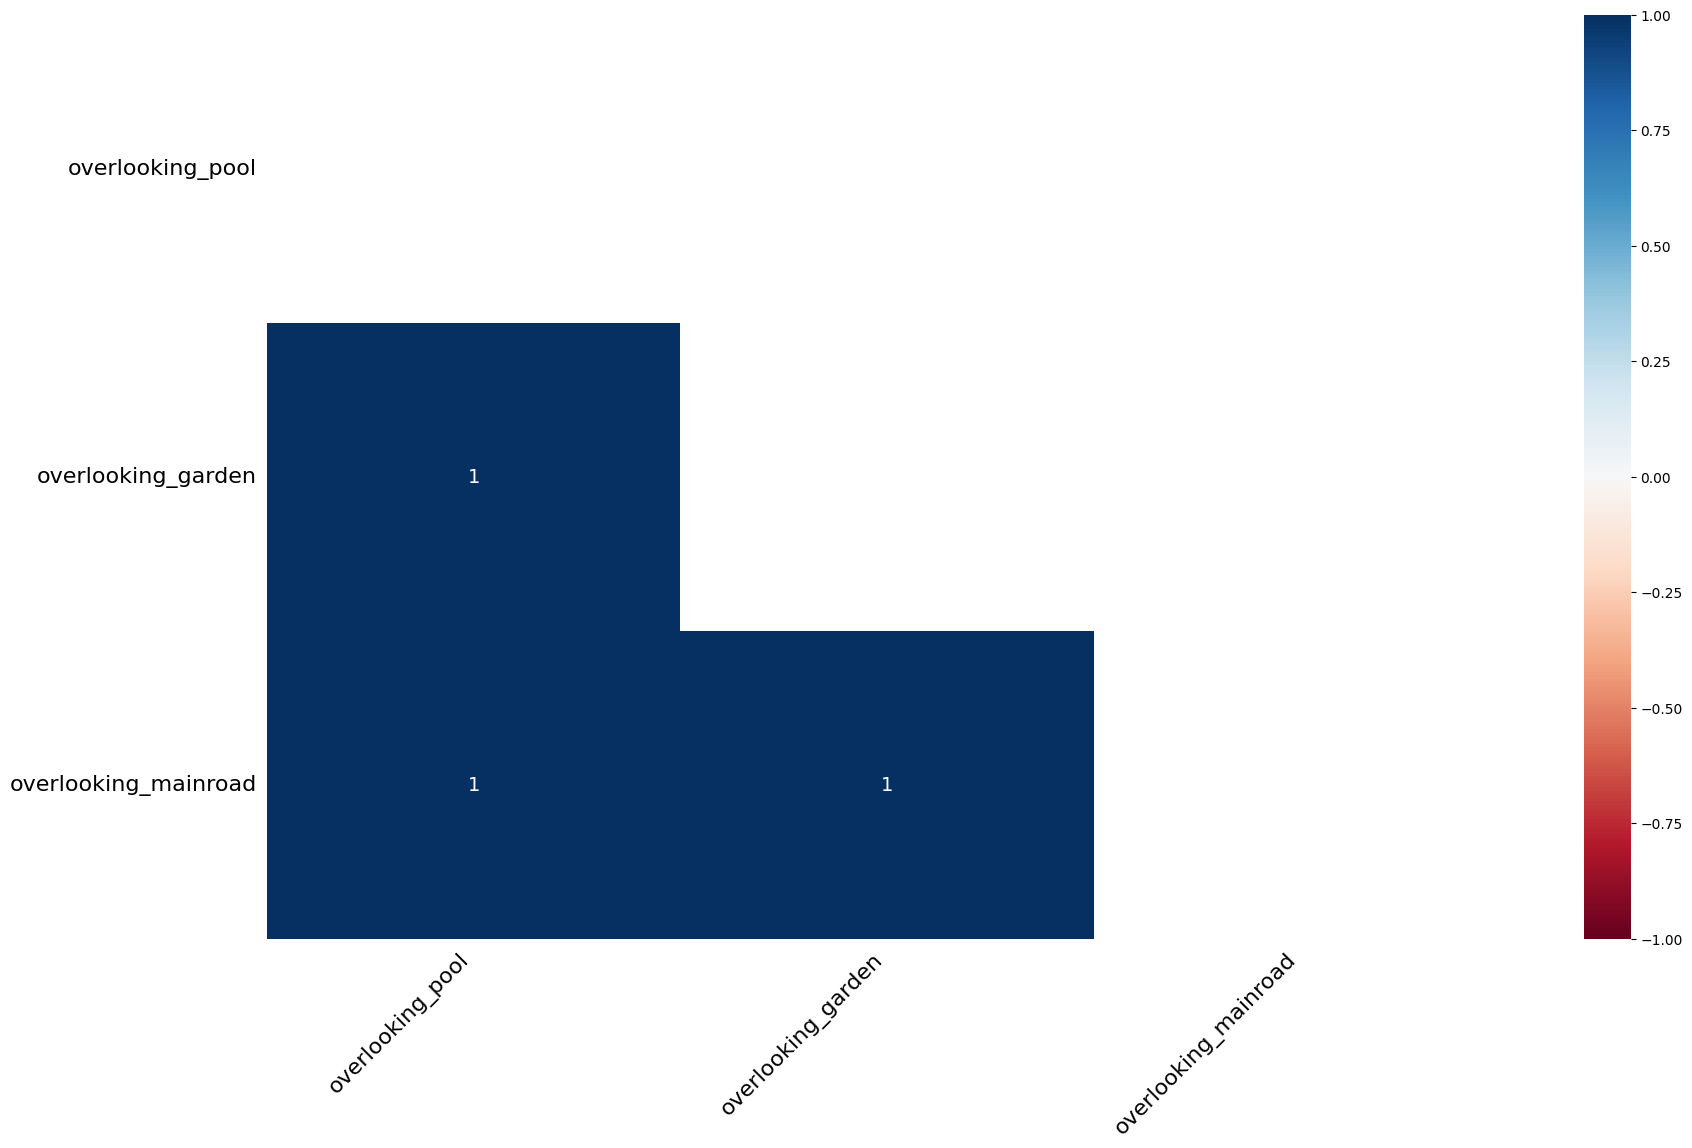

In [164]:
# missingness correlation
(
    houses[["overlooking_pool","overlooking_garden","overlooking_mainroad"]]
    .pipe(msno.heatmap)
)

plt.show()

- Rows with missing values in these columns have majority unfurnished houses and are leading to lesser prices
- These 3 columns always have missing values together
- This gives an indication of Missing not at random (MNAR) and the missingness has meaning

### 7.12 `super_area` and `carpet_area`

In [100]:
houses.super_area

0           NaN
1        1250.0
2           NaN
3           NaN
4         750.0
          ...  
46903       NaN
46904     660.0
46905    2500.0
46906       NaN
46907    1079.0
Name: super_area, Length: 46908, dtype: float64

In [101]:
houses.carpet_area

0        5500.0
1           NaN
2        1175.0
3        1350.0
4           NaN
          ...  
46903    1155.0
46904       NaN
46905       NaN
46906     860.0
46907       NaN
Name: carpet_area, Length: 46908, dtype: float64

In [102]:
(
    houses
    .pipe(eda.num_summary,"super_area")
)

0           NaN
1        1250.0
2           NaN
3           NaN
4         750.0
          ...  
46903       NaN
46904     660.0
46905    2500.0
46906       NaN
46907    1079.0
Name: super_area, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 24,693 rows (52.64 %)
Available Data : 22,215 / 46,908 rows


value
percentile           
0            150.0000
5            550.0000
10           670.0000
25           936.4593
50          1202.0000
75          1580.0000
90          2000.0000
95          2412.3000
99          3900.0000
100         8611.1200

value
mean                1330.151598
trimmed mean (5%)           NaN
trimmed mean (10%)          NaN
median              1202.000000

value
var            460924.537123
std               678.914234
IQR               643.540700
mad               302.000000
coef_variance       0.510404

value
skewness   2.959908
kurtosis  17.953203

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.3773876376499832e-95
Test Statistic       : 0.7996104206012116
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 711.0598248236565
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [103]:
(
    houses
    .pipe(eda.num_summary,"carpet_area")
)

0        5500.0
1           NaN
2        1175.0
3        1350.0
4           NaN
          ...  
46903    1155.0
46904       NaN
46905       NaN
46906     860.0
46907       NaN
Name: carpet_area, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 22,215 rows (47.36 %)
Available Data : 24,693 / 46,908 rows


value
percentile         
0              90.0
5             500.0
10            615.0
25            805.0
50           1060.0
75           1400.0
90           1800.0
95           2200.0
99           3200.0
100         10000.0

value
mean                1171.659833
trimmed mean (5%)           NaN
trimmed mean (10%)          NaN
median              1060.000000

value
var            347826.851216
std               589.768473
IQR               595.000000
mad               286.000000
coef_variance       0.503362

value
skewness   3.211320
kurtosis  26.879067

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.9577042218550636e-96
Test Statistic       : 0.811203325447136
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 699.2406630169717
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [104]:
(
    houses
    .super_area
    .describe(percentiles = [0.002,0.004,0.006,0.008,0.01,0.02,0.03,0.04,0.05,0.992,0.994,0.996,0.998,1])
)

count    22215.000000
mean      1330.151598
std        678.914234
min        150.000000
0.2%       320.000000
0.4%       340.000000
0.6%       366.548382
0.8%       394.712000
1%         400.000000
2%         450.000000
3%         500.000000
4%         530.000000
5%         550.000000
50%       1202.000000
99.2%     4171.288000
99.4%     4471.456000
99.6%     4795.720000
99.8%     6147.608000
100%      8611.120000
max       8611.120000
Name: super_area, dtype: float64

In [105]:
(
    houses
    .carpet_area
    .describe(percentiles = [0.002,0.004,0.006,0.008,0.01,0.02,0.03,0.04,0.05,0.992,0.994,0.996,0.998,1])
)

count    24693.000000
mean      1171.659833
std        589.768473
min         90.000000
0.2%       184.152000
0.4%       262.768000
0.6%       300.000000
0.8%       320.536000
1%         350.000000
2%         400.000000
3%         446.000000
4%         469.000000
5%         500.000000
50%       1060.000000
99.2%     3300.000000
99.4%     3600.000000
99.6%     4000.000000
99.8%     4500.000000
100%     10000.000000
max      10000.000000
Name: carpet_area, dtype: float64

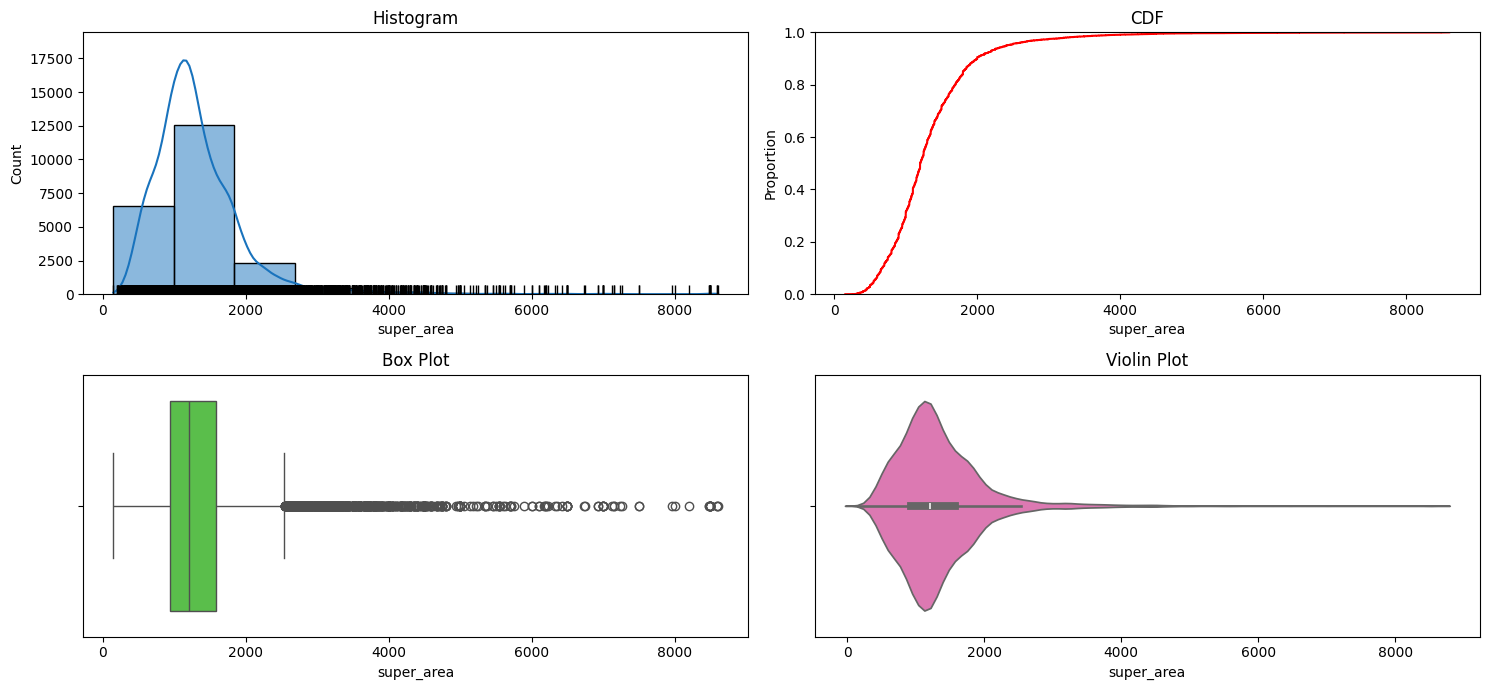

In [106]:
(
    houses
    .loc[lambda df: df.super_area.lt(10000)]
    .pipe(eda.num_univar_plots,"super_area")
)

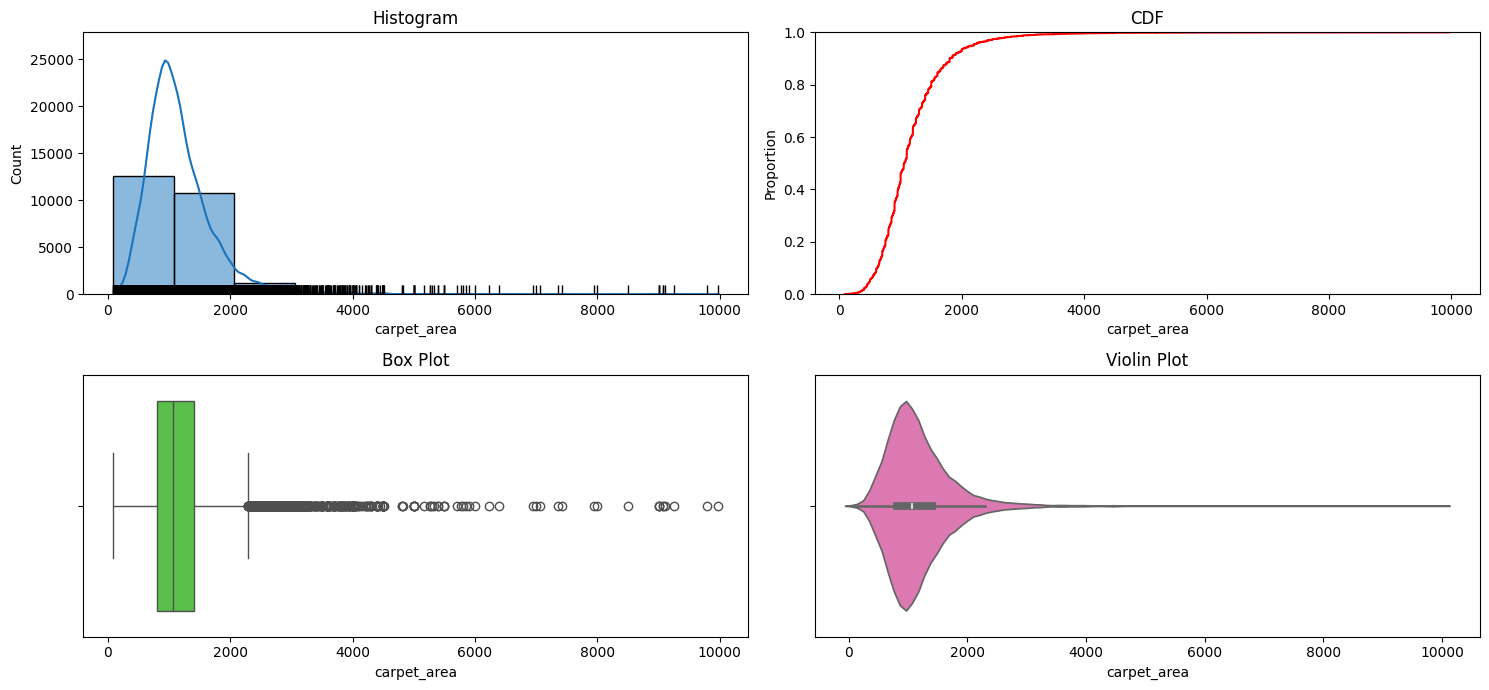

In [107]:
(
    houses
    .loc[lambda df: df.carpet_area.lt(10000)]
    .pipe(eda.num_univar_plots,"carpet_area")
)

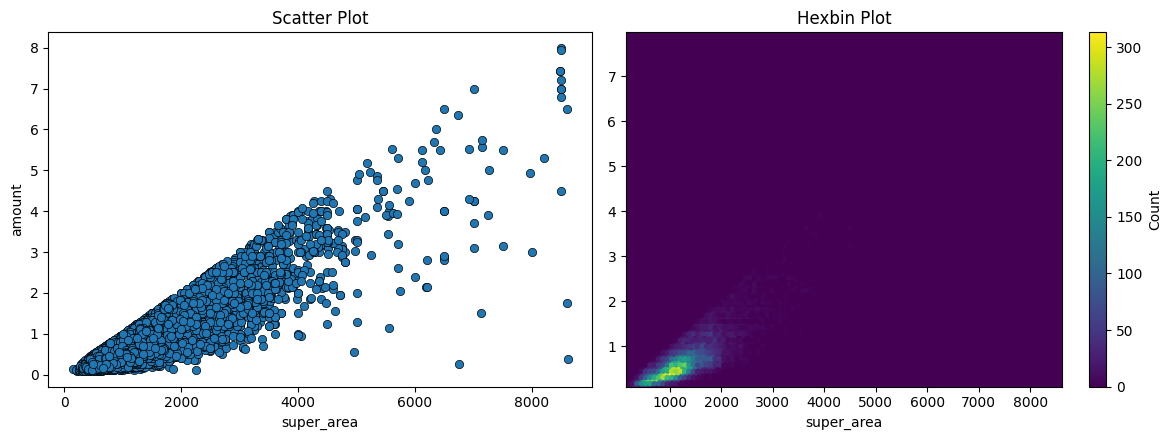

In [108]:
(
    houses
    .loc[lambda df: df.super_area.lt(10000)]
    .pipe(eda.num_bivar_plots,"super_area","amount")
)

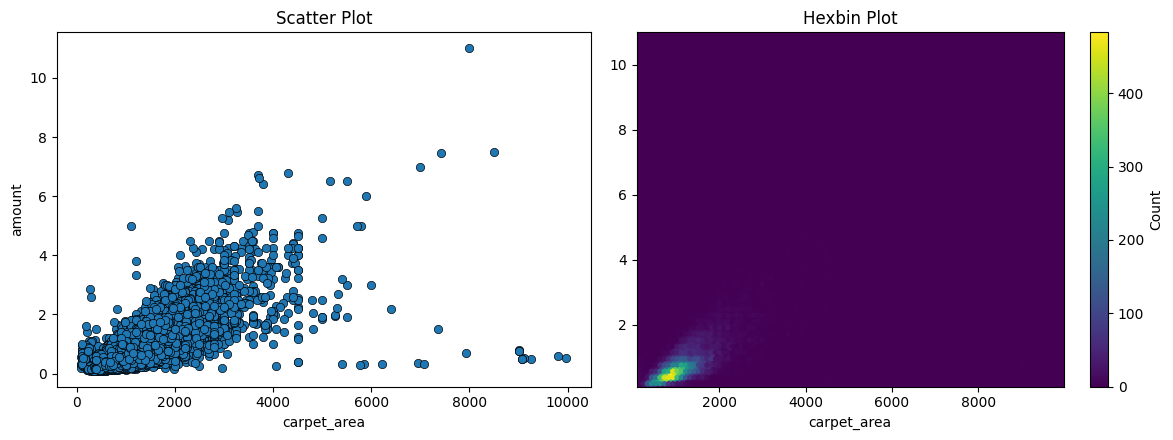

In [109]:
(
    houses
    .loc[lambda df: df.carpet_area.lt(10000)]
    .pipe(eda.num_bivar_plots,"carpet_area","amount")
)

In [111]:
(
    houses
    .loc[lambda df: df.super_area.lt(10000)]
    .pipe(eda.num_num_hyp_testing,"super_area","amount")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.8590942604762603
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables super_area and amount are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7998904634194056
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables super_area and amount are correlated


In [112]:
(
    houses
    .loc[lambda df: df.carpet_area.lt(10000)]
    .pipe(eda.num_num_hyp_testing,"carpet_area","amount")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7265751393282466
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables carpet_area and amount are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7210318392643211
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables carpet_area and amount are correlated


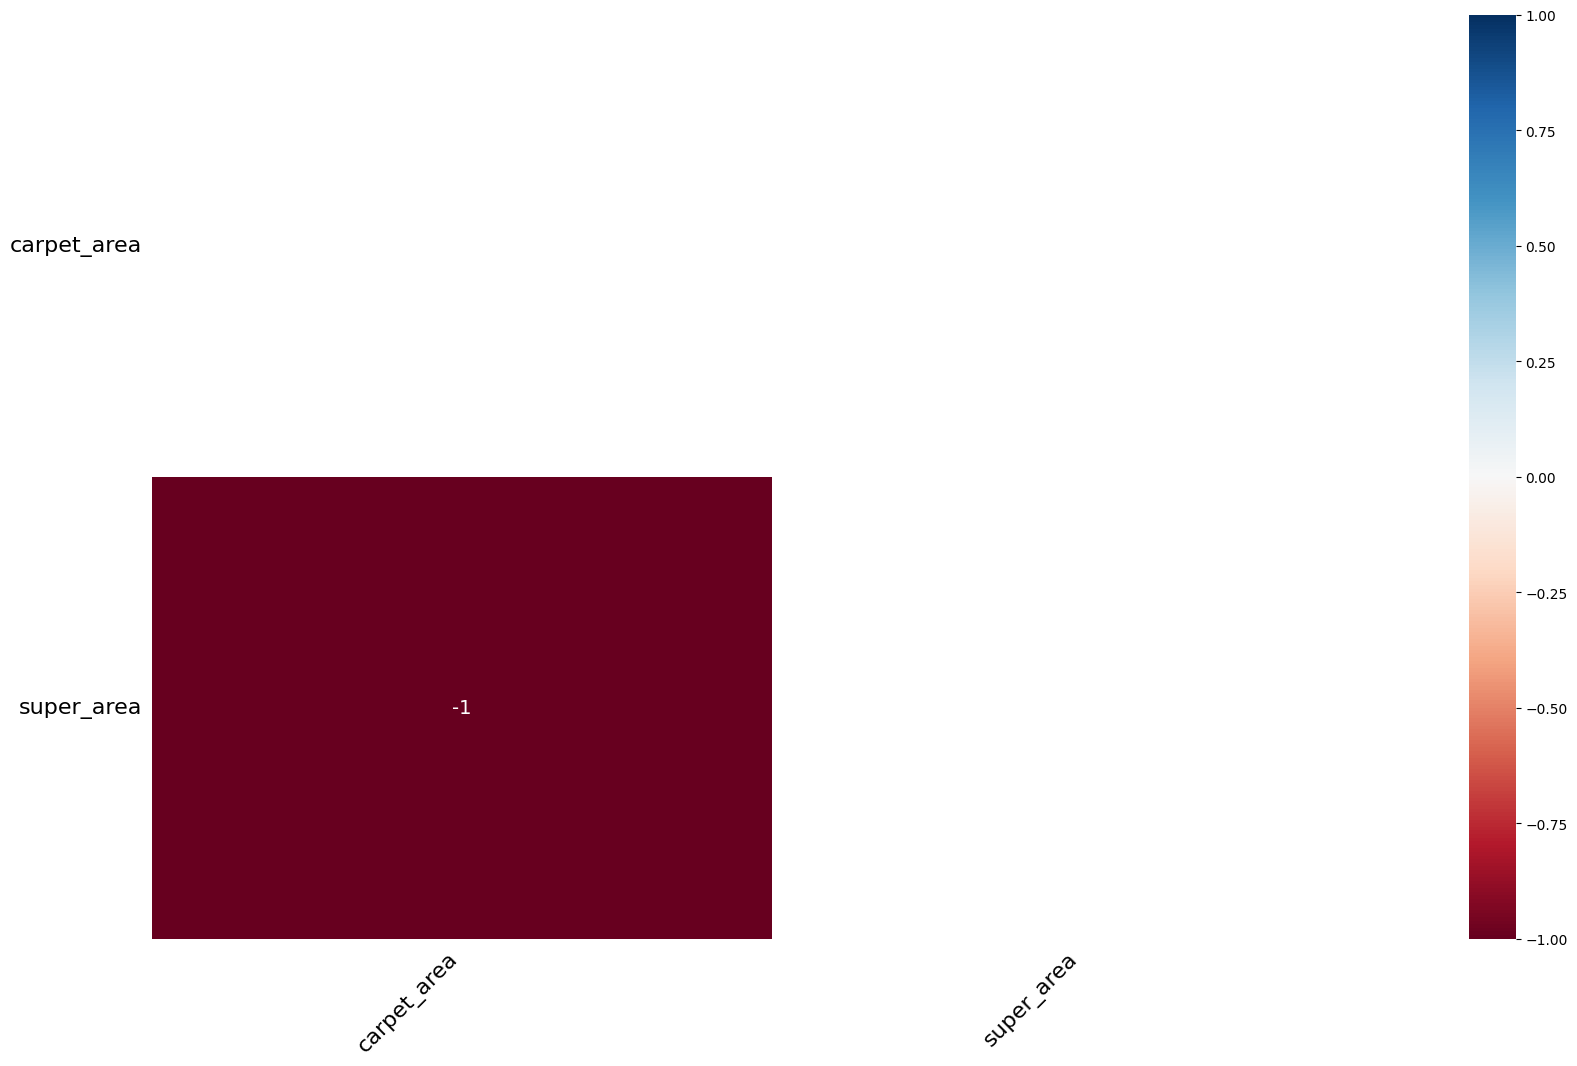

In [167]:
(
    houses[["carpet_area","super_area"]]
    .pipe(msno.heatmap)
)

plt.show()

- both `carpet_area` and `super_area` are mutually exclusive in the dataset

In [168]:
# examining the nature of data with just carpet_area and just super_area

(
  houses
  .loc[houses.super_area.isna()]
  .describe()
)

amount   carpet_area      bathroom       balcony  super_area  \
count  24693.000000  24693.000000  24693.000000  23729.000000         0.0   
mean       0.769109   1171.659833      2.415664      1.926082         NaN   
std        0.565911    589.768473      0.788752      1.004758         NaN   
min        0.100000     90.000000      1.000000      0.000000         NaN   
25%        0.415000    805.000000      2.000000      1.000000         NaN   
50%        0.620000   1060.000000      2.000000      2.000000         NaN   
75%        0.920000   1400.000000      3.000000      3.000000         NaN   
max       11.000000  10000.000000     10.000000     10.000000         NaN   

            num_bhk     is_studio     floor_num    num_floors  \
count  24693.000000  24693.000000  24402.000000  24400.000000   
mean       2.582635      0.000081      4.097492      8.168279   
std        0.779949      0.009000      3.879401      6.036105   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      2.000000      4.000000   
50%        3.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      5.000000     12.000000   
max       10.000000      1.000000     38.000000     84.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count        18965.000000          18965.000000      18965.000000   
mean             0.662694              0.757922          0.233483   
std              0.472803              0.428352          0.423058   
min              0.000000              0.000000          0.000000   
25%              0.000000              1.000000          0.000000   
50%              1.000000              1.000000          0.000000   
75%              1.000000              1.000000          0.000000   
max              1.000000              1.000000          1.000000   

       parking_spots         price  
count   13186.000000  24693.000000  
mean        3.981040   5117.794031  
std        33.053693   1866.928107  
min         1.000000    204.000000  
25%         1.000000   3736.000000  
50%         1.000000   4800.000000  
75%         1.000000   6238.000000  
max       999.000000  10000.000000

In [169]:
(
  houses
  .loc[houses.carpet_area.isna()]
  .describe()
)

amount  carpet_area      bathroom       balcony    super_area  \
count  22215.000000          0.0  22215.000000  10994.000000  22215.000000   
mean       0.699853          NaN      2.278911      1.720302   1330.151598   
std        0.548462          NaN      0.792279      1.081628    678.914234   
min        0.100000          NaN      1.000000      0.000000    150.000000   
25%        0.380000          NaN      2.000000      1.000000    936.459300   
50%        0.560000          NaN      2.000000      2.000000   1202.000000   
75%        0.830000          NaN      3.000000      2.000000   1580.000000   
max        7.980000          NaN     10.000000      8.000000   8611.120000   

            num_bhk     is_studio     floor_num    num_floors  \
count  22215.000000  22215.000000  20891.000000  20861.000000   
mean       2.437317      0.000315      4.061988      7.909496   
std        0.799986      0.017749      3.743887      5.644354   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      0.000000      2.000000      4.000000   
50%        2.000000      0.000000      3.000000      5.000000   
75%        3.000000      0.000000      5.000000     11.000000   
max       10.000000      1.000000     38.000000     88.000000   

       overlooking_garden  overlooking_mainroad  overlooking_pool  \
count         7325.000000           7325.000000       7325.000000   
mean             0.620614              0.725461          0.202867   
std              0.485267              0.446312          0.402162   
min              0.000000              0.000000          0.000000   
25%              0.000000              0.000000          0.000000   
50%              1.000000              1.000000          0.000000   
75%              1.000000              1.000000          0.000000   
max              1.000000              1.000000          1.000000   

       parking_spots         price  
count    6192.000000  22215.000000  
mean        3.674580   5030.599910  
std        32.651588   1799.309774  
min         1.000000    378.000000  
25%         1.000000   3676.000000  
50%         1.000000   4722.000000  
75%         1.000000   6092.500000  
max       908.000000  10000.000000

- rows having `carpet_area` are having higher median amount than rows having `super_area`

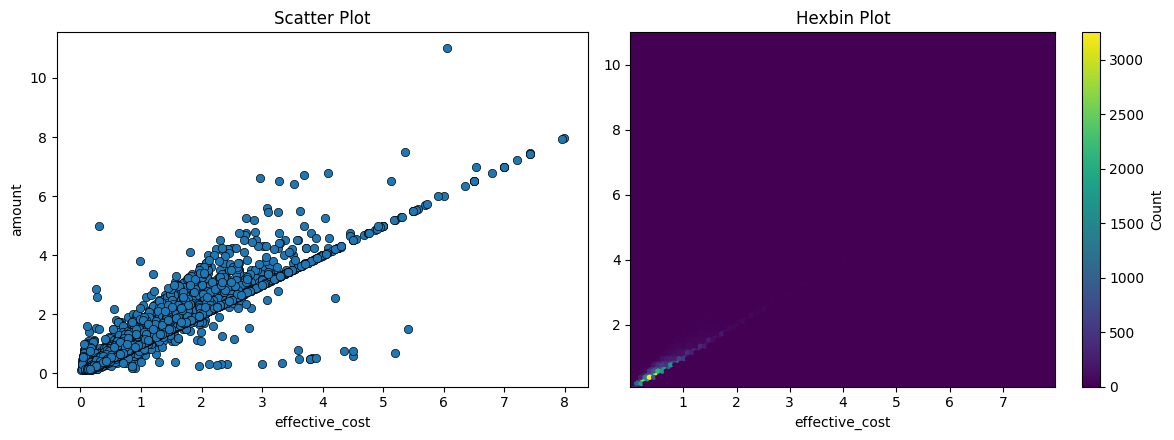

In [186]:
# feature construction - effective area* price per sq ft

(
    houses
    .assign(
        effective_area = lambda df:(
            np.where(
                df.super_area.isna(),
                df.carpet_area,
                df.super_area
            )
        ),
        effective_cost = lambda df:(
            (df.price)*(df.effective_area)/1e7
        )
    )
    .pipe(
        eda.num_bivar_plots,
        "effective_cost",
        "amount"
    )
)

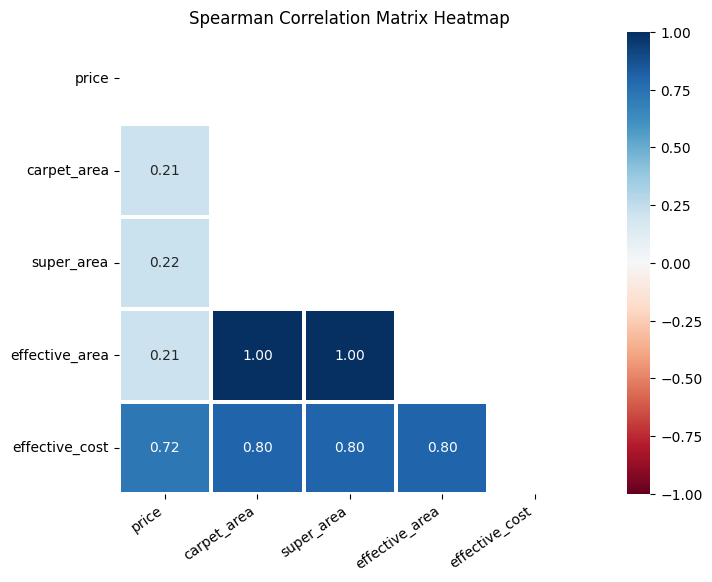

In [188]:
(
    houses[["price","carpet_area","super_area"]]
    .assign(
        effective_area = lambda df:(
            np.where(
                df.super_area.isna(),
                df.carpet_area,
                df.super_area
            )
        ),
        effective_cost = lambda df:(
            (df.price)*(df.effective_area)/1e7
        )
    )
    .pipe(
        eda.correlation_heatmap
    )
)

### 7.13 `parking_cover` and `parking_spots`

In [144]:
houses.parking_cover

0            NaN
1        Covered
2        Covered
3        Covered
4            NaN
          ...   
46903        NaN
46904        NaN
46905        NaN
46906        NaN
46907       Open
Name: parking_cover, Length: 46908, dtype: object

In [157]:
houses.parking_spots

0        NaN
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
46903    NaN
46904    NaN
46905    NaN
46906    NaN
46907    1.0
Name: parking_spots, Length: 46908, dtype: float64

In [145]:
(
    houses
    .pipe(eda.cat_summary,"parking_cover")
)

0            NaN
1        Covered
2        Covered
3        Covered
4            NaN
          ...   
46903        NaN
46904        NaN
46905        NaN
46906        NaN
46907       Open
Name: parking_cover, Length: 46908, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 27,530 rows (58.69 %)
Available Data : 19,378 / 46,908 rows


count     19378
unique        2
top     Covered
freq      16611

count  percentage
category                   
Covered   16611   85.720921
Open       2767   14.279079

In [158]:
(
    houses
    .pipe(eda.num_summary,"parking_spots")
)

0        NaN
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
46903    NaN
46904    NaN
46905    NaN
46906    NaN
46907    1.0
Name: parking_spots, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 27,530 rows (58.69 %)
Available Data : 19,378 / 46,908 rows


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            1.0
75            1.0
90            2.0
95            2.0
99           35.0
100         999.0

value
mean                3.883115
trimmed mean (5%)        NaN
trimmed mean (10%)       NaN
median              1.000000

value
var            1084.069271
std              32.925207
IQR               0.000000
mad               0.000000
coef_variance     8.479071

value
skewness   16.322666
kurtosis  314.633629

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.435010092164835e-133
Test Statistic       : 0.060417429569331715
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 7110.476702864347
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


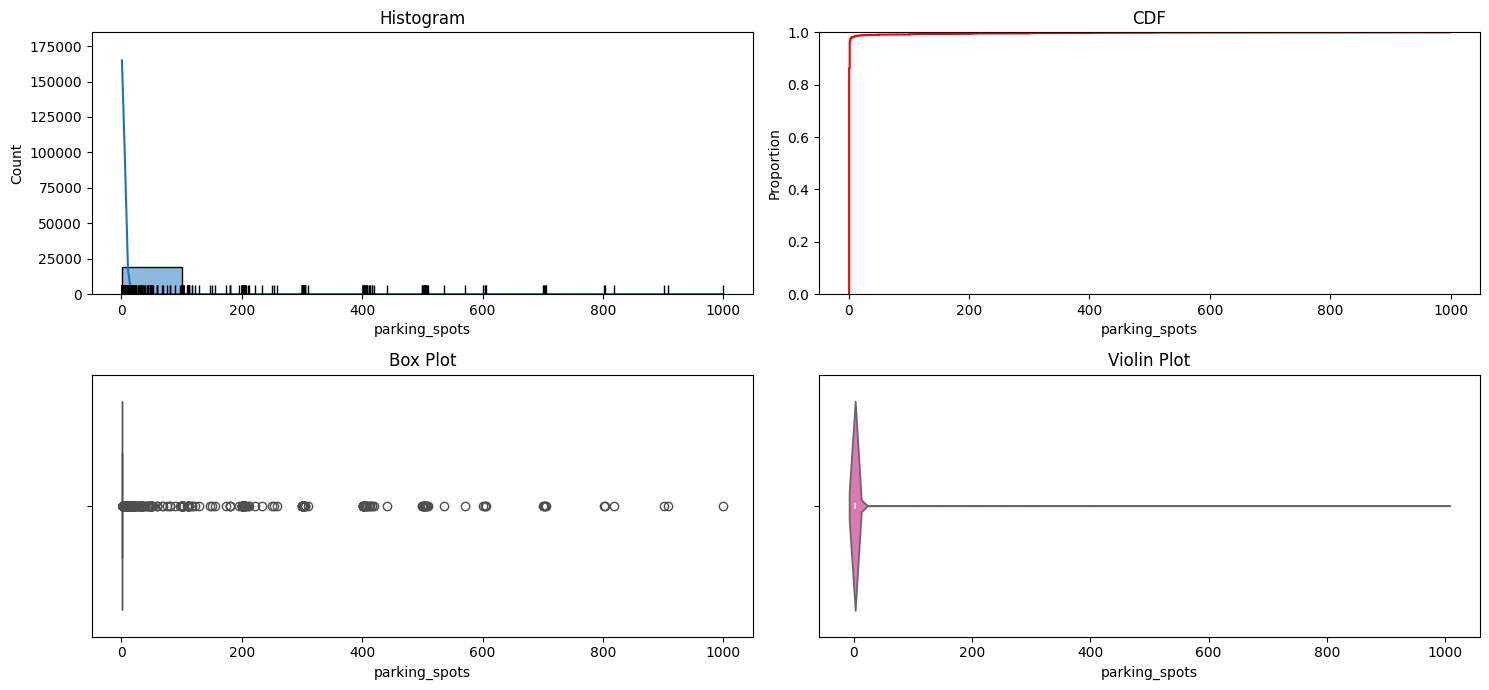

In [159]:
(
    houses
    .pipe(eda.num_univar_plots,"parking_spots")
)

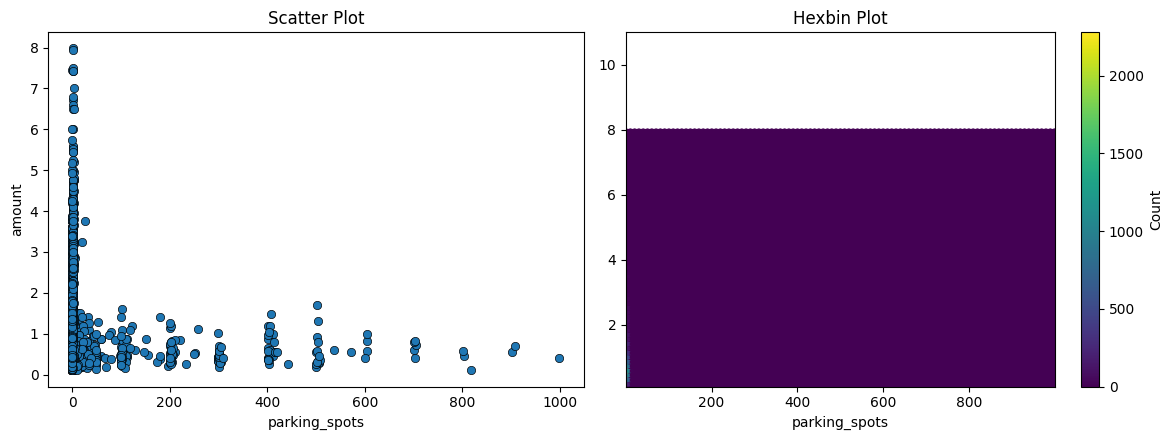

In [160]:
(
    houses
    .pipe(
        eda.num_bivar_plots,"parking_spots","amount"
    )
)

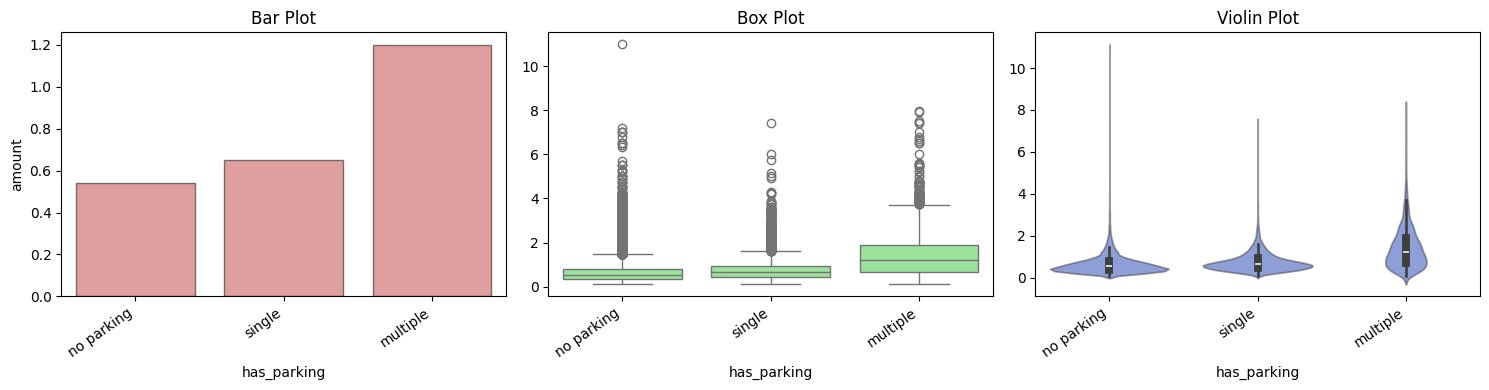

In [165]:
# binning of parking spots

(
    houses
    .assign(
        parking_spots = lambda df: (
            np.where(
                df.parking_spots.isna(),
                0,
                df.parking_spots
            )
        ),
        has_parking = lambda df: (
            np.select(
                [
                    df.parking_spots.eq(0),
                    df.parking_spots.eq(1)
                ],
                ["no parking","single"],
                default = "multiple"
            )
        )
    )
    .pipe(eda.num_cat_bivar_plots,"amount","has_parking",estimator = "median")
)

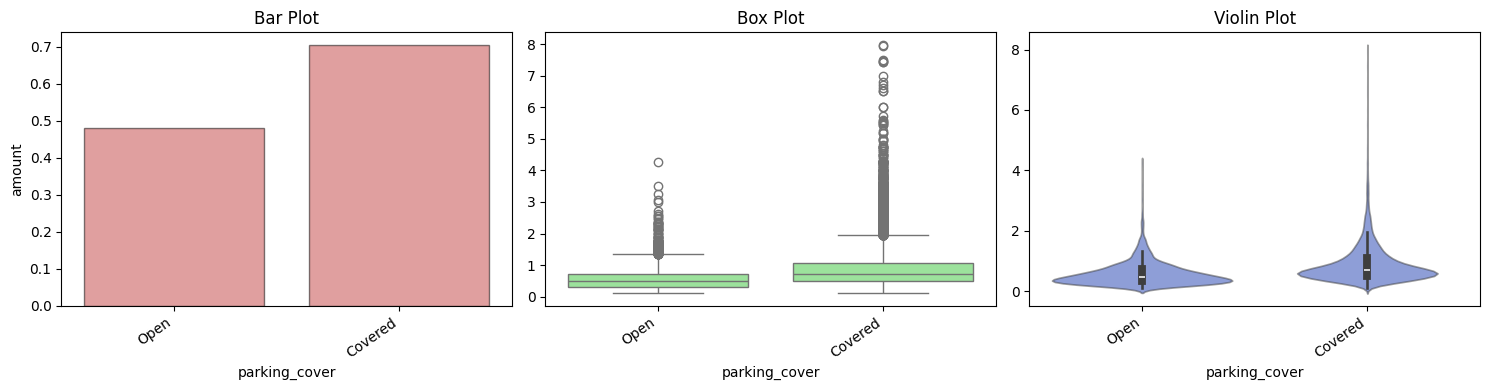

In [146]:
(
    houses
    .pipe(eda.num_cat_bivar_plots,"amount","parking_cover",estimator = "median")
)

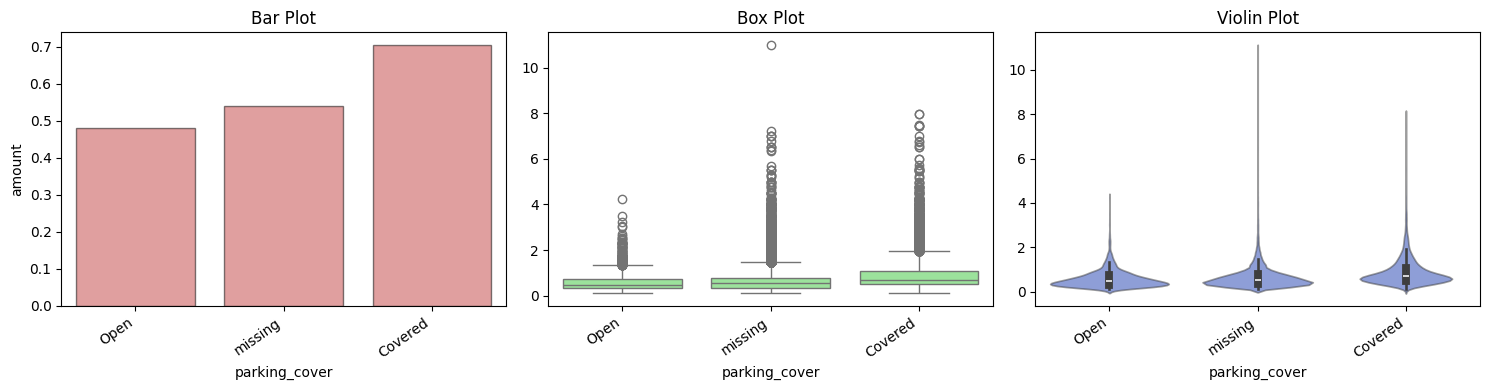

In [149]:
(
    houses[["parking_cover","amount"]]
    .fillna("missing")
    .pipe(eda.num_cat_bivar_plots,"amount","parking_cover",estimator = "median")
)

In [156]:
(
    houses
    .loc[lambda df: df.parking_cover.isna()]
    .describe(include = "O")
)

location transaction   furnishing facing ownership parking_cover
count     27530       27530        26934  11297     11732             0
unique       81           4            3      8         4             0
top     kolkata      Resale  Unfurnished   East  Freehold           NaN
freq       1601       22887        12870   5365      9967           NaN

- Most of the houses have 1 parking spot
- The parking spot information and parking cover information is always missing together
- This gives a slight indication that the missing values are the ones with no parking available

### 7.14 `amount`

In [175]:
houses.amount

0        1.900
1        0.400
2        1.060
3        1.600
4        0.270
         ...  
46903    0.695
46904    0.160
46905    0.650
46906    0.550
46907    0.426
Name: amount, Length: 46908, dtype: float64

In [177]:
(
    houses
    .pipe(eda.num_summary,"amount")
)

0        1.900
1        0.400
2        1.060
3        1.600
4        0.270
         ...  
46903    0.695
46904    0.160
46905    0.650
46906    0.550
46907    0.426
Name: amount, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


value
percentile         
0            0.1000
5            0.2180
10           0.2700
25           0.4000
50           0.6000
75           0.8800
90           1.3500
95           1.7500
99           2.9193
100         11.0000

value
mean                0.736310
trimmed mean (5%)   0.670346
trimmed mean (10%)  0.643007
median              0.600000

value
var            0.312236
std            0.558781
IQR            0.480000
mad            0.230000
coef_variance  0.758893

value
skewness   3.161732
kurtosis  19.204972

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 6.678772353061024e-120
Test Statistic       : 0.7491177273866874
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 2549.5795099219977
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


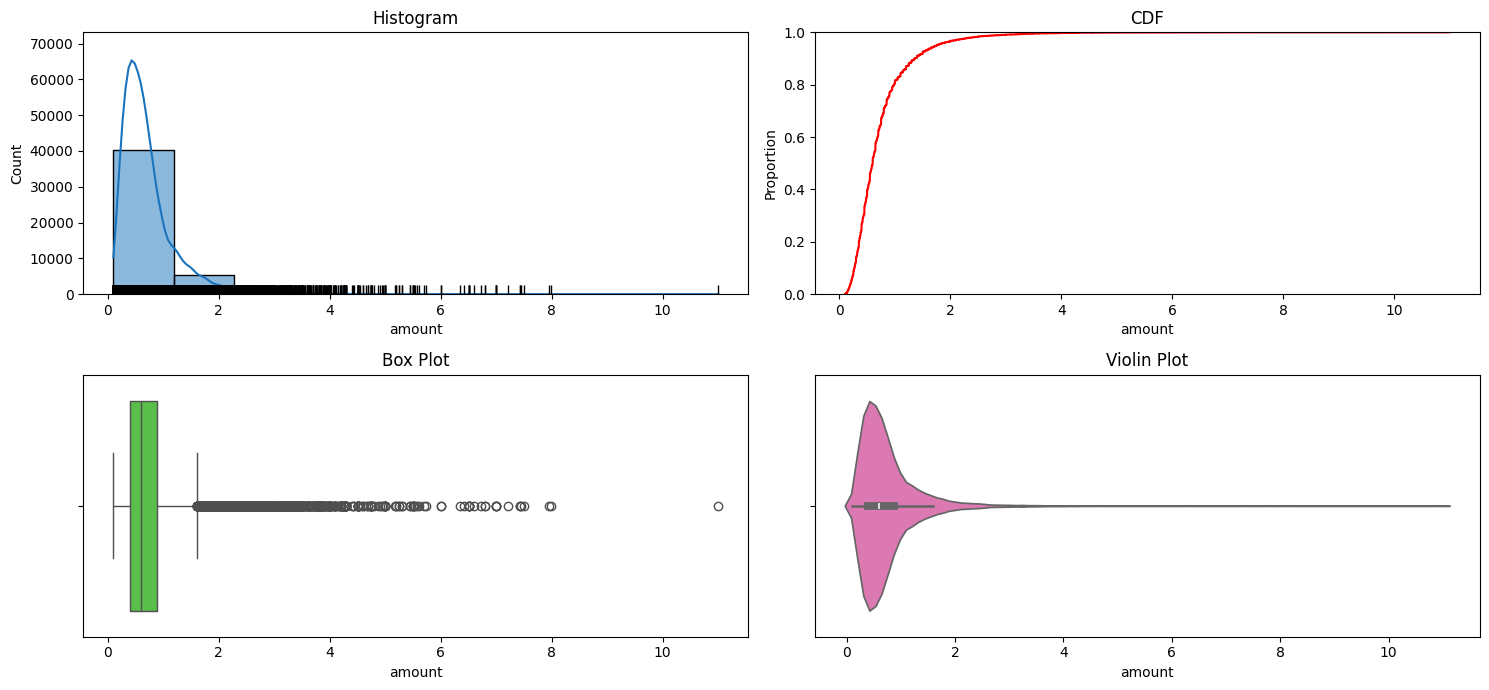

In [176]:
(
    houses
    .pipe(eda.num_univar_plots,"amount")
)

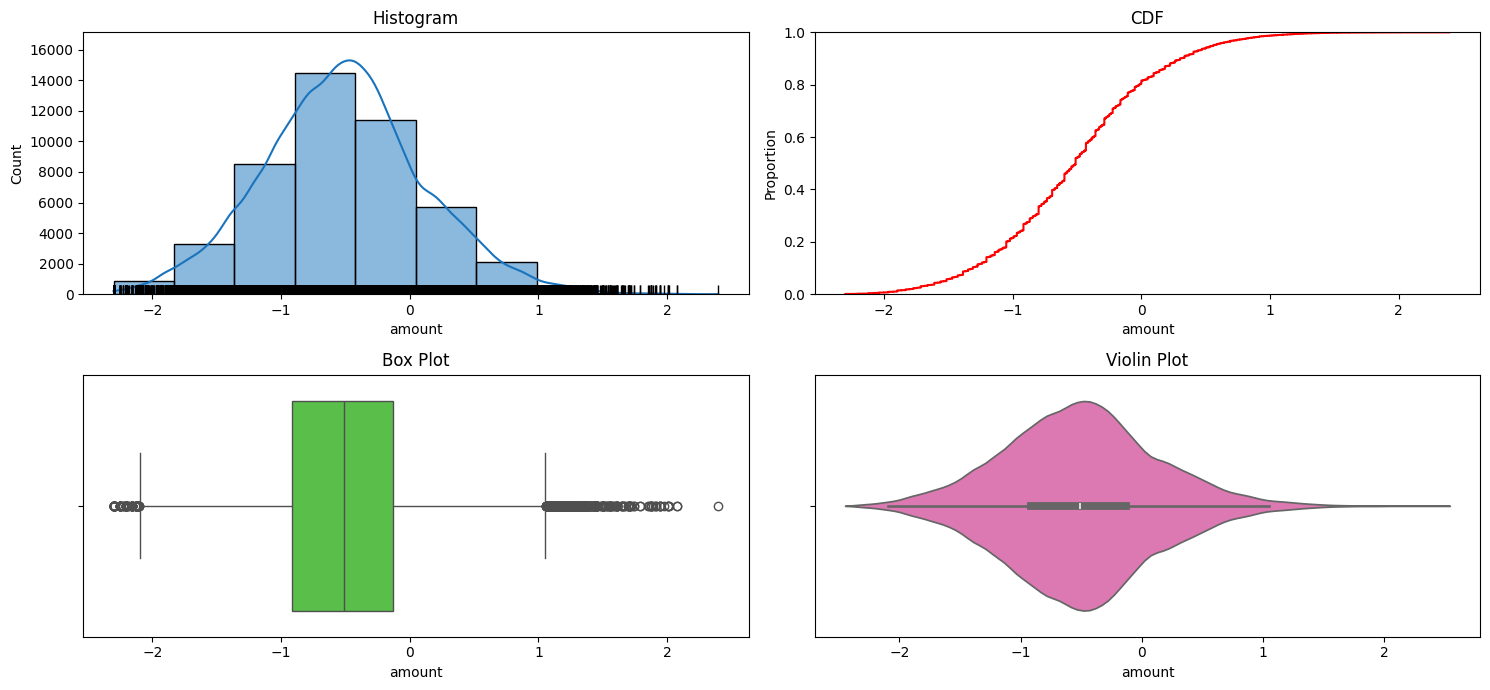

In [179]:
(
    houses
    .assign(amount = np.log(houses.amount))
    .pipe(eda.num_univar_plots,"amount")
)

In [182]:
(
    houses
    .assign(amount = np.log(houses.amount))
    .pipe(eda.num_summary,"amount")
)

0        0.641854
1       -0.916291
2        0.058269
3        0.470004
4       -1.309333
           ...   
46903   -0.363843
46904   -1.832581
46905   -0.430783
46906   -0.597837
46907   -0.853316
Name: amount, Length: 46908, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 46,908 / 46,908 rows


value
percentile          
0          -2.302585
5          -1.523260
10         -1.309333
25         -0.916291
50         -0.510826
75         -0.127833
90          0.300105
95          0.559616
99          1.071343
100         2.397895

value
mean               -0.512758
trimmed mean (5%)  -0.519128
trimmed mean (10%) -0.522299
median             -0.510826

value
var            0.395971
std            0.629262
IQR            0.788457
mad            0.405465
coef_variance -1.227210

value
skewness  0.177555
kurtosis  0.193796

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.7863559782534113e-28
Test Statistic       : 0.9970258054004586
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 35.39174626171007
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed
